In today's world , Credit cards are becoming increasingly popular for day-to-day purchase, especially in restaurants, movie tickets , etc. It saves a lot of people from carrying cash with them , specially reducing risks of theft and also makes payments effortless and easier for people. The global credit card payments market revenue was valued at 138.43 billion dollars in 2020 and is projected to reach 263.47 billion dollars by 2028, growing at a Compound Annual Growth Rate (CAGR) of 8.5% from 2021 to 2028. According to a research report published by Mastercard in 2020, 42% of Indians have increased the use of digital payment systems, which mainly include contactless credit cards, online payments, and others, which fuel the growth of the market.

In Banking system, one of the major problems that a bank face( specifically the smaller banks and NBFCs )is customer churn. On the other hand, credit cards are a major source of income of the banks but they come with a risk of default. In this assignment, we are trying classification models so that a small financal institute which is just starting it's operations in the lending business can predict churners and defaulters to tackle them efficiently.

 And right now in India ,there is a bubble of credit cards or credit has a whole credit system and it is important for a financial institute to be cautious about defaults while earning more keeping as much customers as possible.

 https://economictimes.indiatimes.com/wealth/spend/credit-card-defaults-on-the-rise-what-is-the-punishment-for-credit-card-default/articleshow/113690164.cms?from=mdr

 https://www.moneycontrol.com/news/business/rbi-intensifies-scrutiny-on-nbfc-loan-growth-amid-fears-of-credit-bubble-high-delinquencies-report-12822310.html

##### But the data that are using here is not of any perticular bank. But the main objective of the model is to get a proper idea to tackle these real life problems

### Pseudo-code of models

```
# Logistic Regression

initialize weights w = [w1, w2, ..., wn] to small random values
initialize bias b = 0
set regularization parameter alpha
set number of iterations T
For iteration t = 1 to T:
        z = w^T * xi + b
        prediction = sigmoid(z)
        loss = -(yi * log(prediction) + (1 - yi) * log(1 - prediction))
        total loss += loss
        gradient_w = (prediction - yi) * xi
        gradient_b = prediction - yi  
        w = w - alpha * gradient_w  
        b = b - alpha * gradient_b  
For each new input x_new:
    z_new = w^T * x_new + b
    prediction_new = sigmoid(z_new)
    if prediction_new > 0.5:
        predicted_class = 1
    else:
        predicted_class = 0
```



```
# decisiontree(D,eta,pi):  #[D->dataset, eta->leaf size, pi=leaf purity threshold]
1. n = |D| #partition_size
2. ni = |{xj|xi BELONGS TO D, yi=ci}| #size of class ci
3. purity(D) = maxi{ni/n} #calculate purity of the node, which is the proportion of the most frequent class in D
5. if n<=eta:
     c*=argmaxci{ni/n} #majority_class
     create leaf node and lable it with class c*
     return
6. split_point*, score*=phi,0  #score in the decision tree pseudocode is a measure of how well a potential split divides the dataset into more pure subsets (lower impurity)(here: Gini impurity)
7. for(Xj):
    if(Xj  is numeric):
       v,score=EVALUATE-NUMERIC(D,Xj) #[v is the range of values for attribute Xj]
       if score>score*:
         split_point*,score*= Xj<=v,score
    else if(Xj is categorical):
       V,score=EVALUATE-CATEGORICAL(D,Xj) #[V some subset of values in te domain of Xj]
       if score>score*:
         split_point*,score*= Xj BELONGS TO V,score
#partition D into Dy and Dn using split point* and call recursively
8. Dy={xT|x BELONGS TO D satisfies split_point*} #points that satisfies the split decision
9. Dn={xT|x BELONGS TO D does not satisfies split_point*} #points that does not satisfies the split decision
10. create internal node split point*, with two child nodes, Dy and Dn
11. decisiontree(Dy); decisiontree(Dn)
```

```
randomforest(D,K,p,eta,pi): #[K= number of n estimators, here best ones are: 75 for the first problem and 50 for the second, p=number of attributs used for spitting, typically p=root under d]
1. for (xi BELONGS TO D): 
   vj(xi)=0 #j=1,2,3,...,k
2. for t BELONGS TO [1,K]:
   Dt=sample of size n with replacement from D
   Mt=decisiontree(Dt,eta,pi,p)
   for(xi,yi) BELONGS TO D\Dt:
     yhati=Mt(xi)
     if yhati=cj:
        vj(xi)=vj(xi)+1
3. oob= 1/n * sum(I)  #oob_error
4. return{M1,M2,....Mk} #return the set of trained decision trees

```

2. XG boost and LightGBM:
 XG boost classifier and LGBM classifier are framework based on gradient boosting classifier. They both are faster and memory efficient compared to gradient boosting. Both classifieers have regularization terms. But the key difference between two is: LGBM grows trees verically and leaf wise while XG boost grows horizontally.
```
 function GBMClassifier(X, y, num_trees, learning_rate, max_depth):
    # Initialize 
    F_0(x) = log-odds of the positive class

    # For each tree in the ensemble
    for t from 1 to num_trees:
        r_t = y - F_(t-1)(X)  // Residuals: Actual - Predicted probabilities
        
        #Compute the negative gradient (pseudo-residuals)
        g_t = - gradient(loss_function(F_(t-1)(X), y))  

        # Fit a decision tree to the negative gradients
        tree_t = FitDecisionTree(X, g_t, max_depth)

        # Update the model with the predictions from the new tree
        F_t(x) = F_(t-1)(x) + learning_rate * tree_t(x)

    return F_t  

function FitDecisionTree(X, g, max_depth):
    # Build a decision tree using the features X and target g (negative gradients)
    # Split the data based on features to minimize the loss
    # Return the trained tree structure

function predict(F_t, X):
    # Calculate the predicted probabilities
    prob = sigmoid(F_t(X))  
    predictions = 1 if prob > 0.5 else 0 
    return predictions
```

# Using Classification Models to predict Credit Card Default by a customer

Classification models are an effective way to predict if a customer will be able to re-pay the amount of money lent or the amount used on their credit cards within a stipulated period of time. A lot of banks use these models to understand customer behaviour ;if he/she will default the next payment based on past features of the customer like previous defaults, yearly income, credit score, etc.
We have made the following assumptions while performing the pre-processing of the data:-


* There were very few rows with missing values under Credit Score . They have been removed , instead of being replaced with some other value. This is because Credit Score is a crucial factor in determining Credit Default and we have not considered filling them with other values since it is not the only determining factor and there are banks who offer Credit Cards based on Savings account, Fixed Deposit Account if the individual does not have a Credit history.

* In a similar manner , rows with null values in "Migrant Worker" column have also been removed since we felt that the dataset is diverse and the chance of a person being a migrant worker solely depends on his occupation and cannot be filled in looking at the rest of the data.

* Yearly debt payments is an essential factor for credit score and credit default and hence the rows with null values have not been imputed but removed since it is independent and cannot be filled in by other values.

* Previous defaults and default in last 6 months seem similar , but we have used both since previous defaults give an overview about the person's defaulting mindset and default in last 6 months gives a recent and better understanding about the person.



## Data Overview
It is difficult to obtain data on credit card default directly from public domains and hence we have obtained it from Kaggle. This dataset on a whole has 45,529 rows and 18 columns/attributes. It is a highly imbalanced dataset with 8.7 % defaulters and 91.3 % non-defaulters. The rows comprise of the data colected from various individuals and the columns are as follows:-

* name - Name of the individuals whose data have been collected
* age - Age of the individuals whose data have been collected
* gender - Gender individuals whose data have been collected (F/M)
* owns_car - If the individuals own a car or not (Y/N)
* owns_house - If the individuals own a house or not (Y/N)
* no_of_children - Number of children of the individuals whose data have been collected
* net_yearly_income - Yearly income of the individuals whose data have been collected
* occupation_type - Names of jobs of the individuals whose data have been collected
* total_family_members - Number of family members of the individuals whose data have been collected
* migrant_worker - If the individual is a migrant worker or not (1- Yes 0- No)
* yearly_debt_payments - Debt amount the individual has to pay per year
* credit_limit - Maximum amount of money the individual can borrow on a credit card or line of credit at any given time
* credit_limit_used(%) - Percentage of total credit limit that the individual has currently used
* credit_score - Score given by lenders and financial institutions to determine the creditworthiness of a person or a small, owner-operated business , based on past reports
* prev_defaults - Number of default payments of the individuals in the past
* default_in_last_6months - If the individual has any default payment in the last 6 months (1- Yes 0- No)
* no_of_days_employed - The individual's current employment status
* credit_card_default - This is the target column and represents whether the person will default or not (0-  No , 1-Yes)


### Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer, make_column_selector
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn import set_config
from sklearn.pipeline import make_pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.exceptions import NotFittedError
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier
from imblearn.under_sampling import RandomUnderSampler
import warnings
warnings.filterwarnings("ignore")

### Data Collection and Pre-Processing

Dataset: https://www.kaggle.com/datasets/pradip11/amexpert-codelab-2021?select=test.csv

* Name, customer id have been dropped since they don't affect Credit default.
Similarly , number of children and total family members are also not important attributes in this context so they have been dropped as well.

* For the occupation attribute , there were lots of unique values, so we have tried to group them together roughly based on skill level. Occupations like cook, driver, waiter etc have been grouped as "Skilled staff" and others like manager , medical staff, accountant , etc have been grouped under "High-Skilled staff" . This is totally based on our understanding ,assumption and relevancy of the model and we do not aim to discriminate between any work based on skills.

* Since issuing a credit card does not entirely depend on the job type but more on the income, there were some occupations as "Unknown" which we have not dropped from the data owing to the yearly income. They have been grouped as "Others".




In [ ]:
df = pd.read_csv('/content/train2.csv')

In [ ]:
df.drop(['customer_id','name'],axis=1,inplace=True)
df.drop(['no_of_children', 'total_family_members'], axis=1, inplace=True)

def process_occupation(x):

    if(type(x) is int): return None
    if(type(x) is float): return None

    x = x.lower()
    if('security' in x or 'cook' in x or 'waiters' in x or 'Labor' in x or 'rea' in x or 'dri' in x): return 'SKILLED STAFF'
    if('high' in x or 'sales' in x or 'core' in x or 'med' in x or 'hr' in x or 'acc' in x or 'man' in x or 'pri' in x or 'sec' in x or 'it' in x ): return 'HIGH-SKILL STAFF'
    else: return 'OTHER'

df["occupation_type"] = df["occupation_type"].apply(process_occupation)

df.dropna(subset=['no_of_days_employed'], inplace=True)
df = df.reset_index(drop=True)
df['no_of_years_employed'] = df['no_of_days_employed'] / 365
df['no_of_years_employed'] = df['no_of_years_employed'].astype(int)
df = df[df['no_of_years_employed'] != 1000]
df['no_of_years_employed'].value_counts()
df.drop(['no_of_days_employed'],axis=1,inplace=True)
df = df.reset_index(drop=True)

df.dropna(subset=['migrant_worker'], inplace=True)
df = df.reset_index(drop=True)

df.dropna(subset=['credit_score'], inplace=True)
df = df.reset_index(drop=True)

df.dropna(subset=['yearly_debt_payments'], inplace=True)
df = df.reset_index(drop=True)

df['owns_car'].fillna(df['owns_car'].mode()[0], inplace=True)

### Data Description

In [ ]:
print(df.info())
print(df.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36815 entries, 0 to 36814
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      36815 non-null  int64  
 1   gender                   36815 non-null  object 
 2   owns_car                 36815 non-null  object 
 3   owns_house               36815 non-null  object 
 4   net_yearly_income        36815 non-null  float64
 5   occupation_type          36815 non-null  object 
 6   migrant_worker           36815 non-null  float64
 7   yearly_debt_payments     36815 non-null  float64
 8   credit_limit             36815 non-null  float64
 9   credit_limit_used(%)     36815 non-null  int64  
 10  credit_score             36815 non-null  float64
 11  prev_defaults            36815 non-null  int64  
 12  default_in_last_6months  36815 non-null  int64  
 13  credit_card_default      36815 non-null  int64  
 14  no_of_years_employed  

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,36815.0,38.985549,9.549112,23.00,31.000,39.00,47.00,5.500000e+01
net_yearly_income,36815.0,209989.609447,742370.387567,29191.13,134204.490,179341.19,248467.42,1.407590e+08
migrant_worker,36815.0,0.218145,0.412992,0.00,0.000,0.00,0.00,1.000000e+00
yearly_debt_payments,36815.0,32663.595408,17500.168445,2237.47,19990.860,30067.44,41639.01,3.281129e+05
credit_limit,36815.0,45504.666500,164943.673758,4030.68,25155.335,37217.88,55456.61,3.112997e+07
credit_limit_used(%),36815.0,52.514030,29.354959,0.00,27.000,54.00,79.00,9.900000e+01
credit_score,36815.0,781.178270,101.306364,500.00,702.000,784.00,866.00,9.490000e+02
prev_defaults,36815.0,0.065218,0.273830,0.00,0.000,0.00,0.00,2.000000e+00
default_in_last_6months,36815.0,0.054081,0.226181,0.00,0.000,0.00,0.00,1.000000e+00
credit_card_default,36815.0,0.087193,0.282121,0.00,0.000,0.00,0.00,1.000000e+00


### EDA

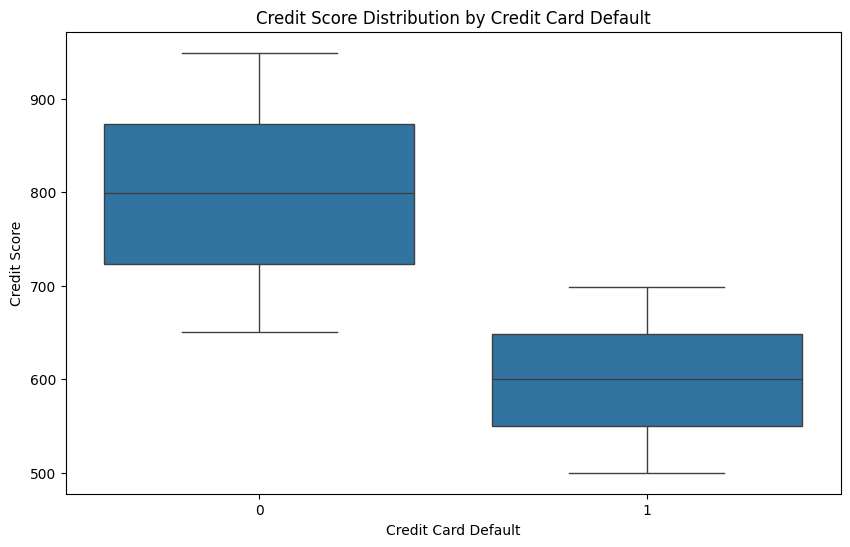

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='credit_card_default', y='credit_score', showfliers=False, data=df)
plt.title('Credit Score Distribution by Credit Card Default')
plt.xlabel('Credit Card Default')
plt.ylabel('Credit Score')
plt.show()

The plot represents the relationship between Credit Score and Credit Card Default.

* The median score for people who defaulted is lower compared to those who did not. This suggests a negative correlation between both.
* The IQRs for both the boxplots overlap, suggesting that there might be some people with low credit scores who might not default and some with high credit scores who might default.

This suggests that although credit score is a crucial factor to determine credit card default , it is not the only factor.



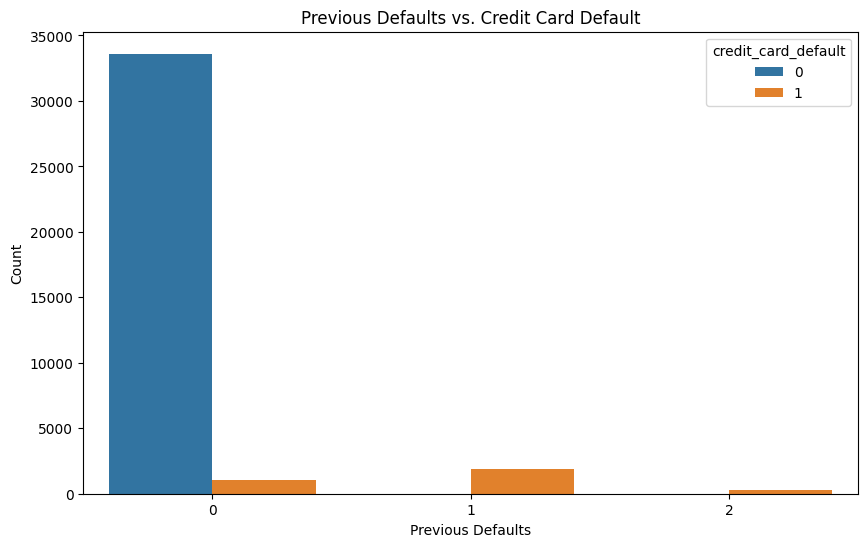

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x='prev_defaults', hue='credit_card_default', data=df)
plt.title('Previous Defaults vs. Credit Card Default')
plt.xlabel('Previous Defaults')
plt.ylabel('Count')
plt.show()

This plot suggests a relationship between the no. of times people have defaulted in the past and their current default status.


* As seen from the plot, as the number of previous defaults increases, the proportion of customers defaulting also increases.
* There is a strong association between both as customers with a history of multiple defaults are significantly more likely to default again.

This is crucial for risk assessment. Banks and financial institutions can use this insight to identify high-risk customers.



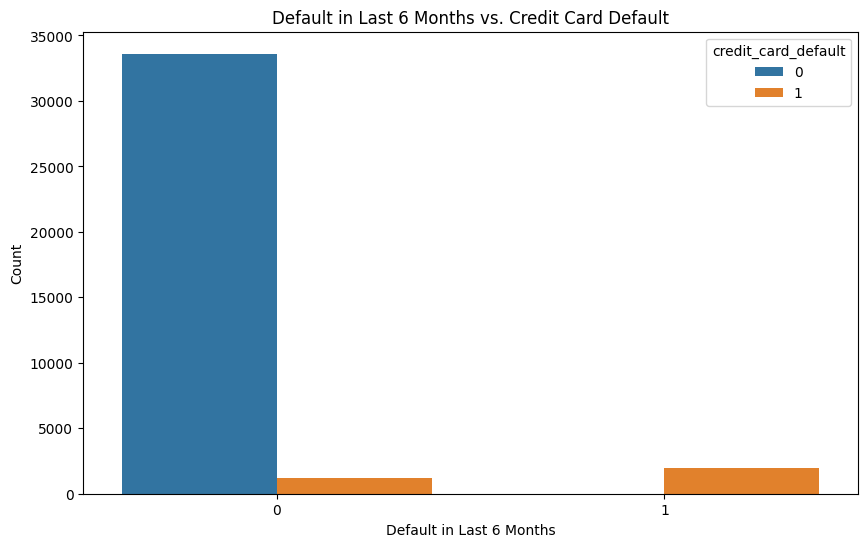

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x='default_in_last_6months', hue='credit_card_default', data=df)
plt.title('Default in Last 6 Months vs. Credit Card Default')
plt.xlabel('Default in Last 6 Months')
plt.ylabel('Count')
plt.show()

Similar to the previous plot above , this too displays a strong relationship between both the variables.


* Individuals who defaulted in the last 6 months are considerably more prone to defaulting again.
* The plot highlights the significance of recent financial behavior in assessing creditworthiness. A recent default serves as a strong indicator of potential future defaults.



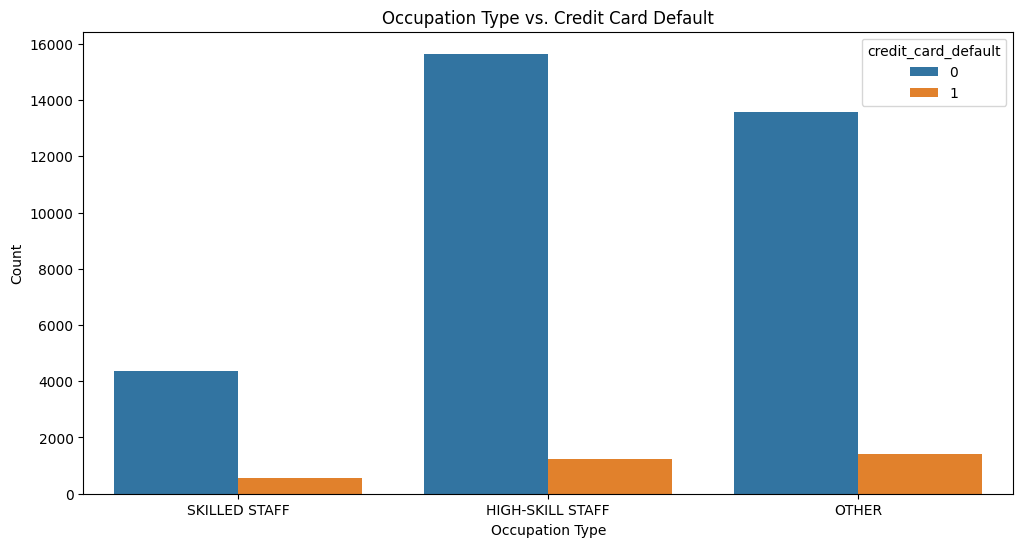

In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(x='occupation_type', hue='credit_card_default', data=df, order=['SKILLED STAFF', 'HIGH-SKILL STAFF', 'OTHER'])
plt.title('Occupation Type vs. Credit Card Default')
plt.xlabel('Occupation Type')
plt.ylabel('Count')
plt.show()

* Skilled Staff: Individuals categorized as "Skilled Staff" exhibit the highest probability of credit card default among the three occupation types. This suggests that individuals in occupations requiring specialized skills but potentially offering lower wages or job security may face greater financial challenges, increasing their susceptibility to default.

* High-Skill Staff: Individuals categorized as "High-Skill Staff" have the lowest probability of credit card default, indicating that those in occupations requiring advanced education or expertise tend to have greater financial stability and lower default risk.

* Other: Individuals categorized as "Other" fall in between the two extremes, with a moderate likelihood of credit card default. This category encompasses a diverse range of occupations, making it difficult to draw specific conclusions without further analysis.






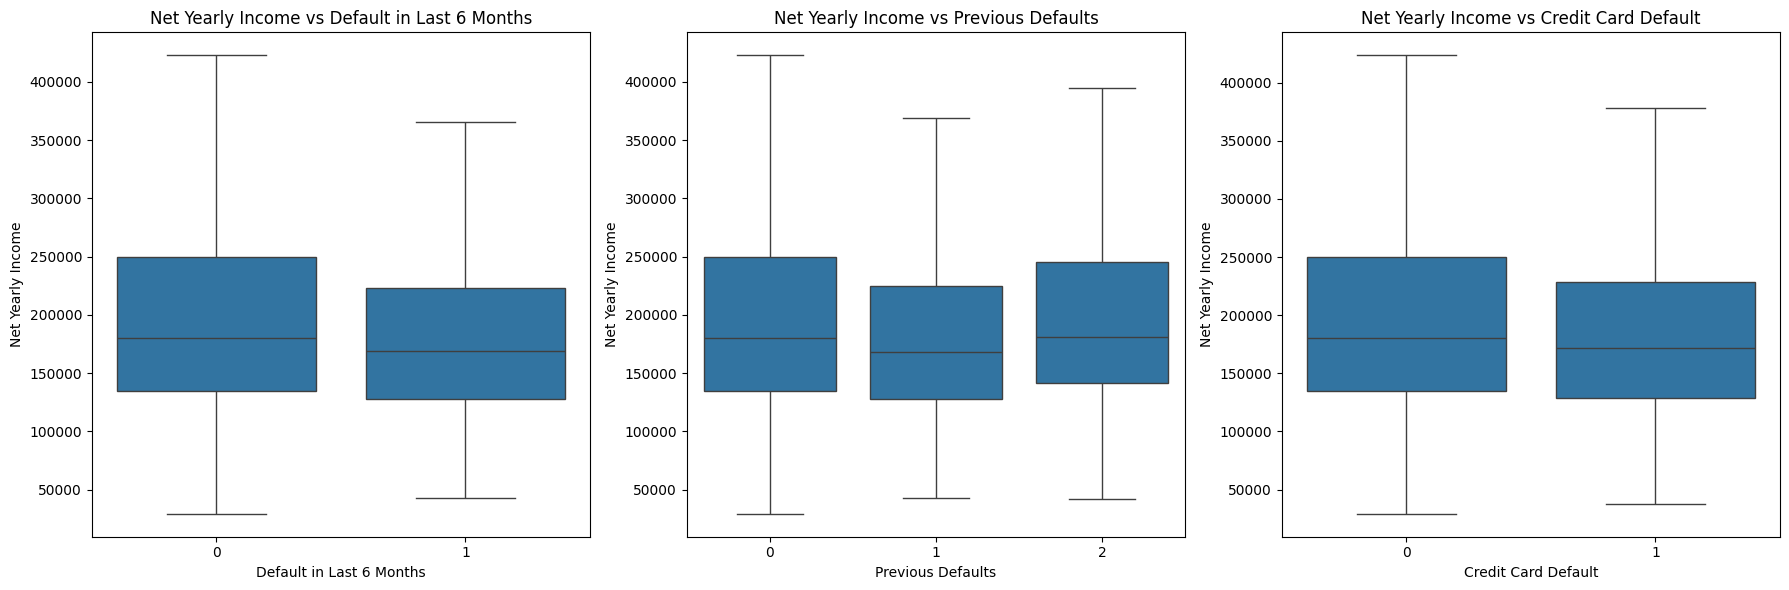

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

sns.boxplot(x='default_in_last_6months', y='net_yearly_income', data=df, ax=axes[0], showfliers=False)
axes[0].set_title('Net Yearly Income vs Default in Last 6 Months')
axes[0].set_xlabel('Default in Last 6 Months')
axes[0].set_ylabel('Net Yearly Income')

sns.boxplot(x='prev_defaults', y='net_yearly_income', data=df, ax=axes[1], showfliers=False)
axes[1].set_title('Net Yearly Income vs Previous Defaults')
axes[1].set_xlabel('Previous Defaults')
axes[1].set_ylabel('Net Yearly Income')

sns.boxplot(x='credit_card_default', y='net_yearly_income', data=df, ax=axes[2], showfliers=False)
axes[2].set_title('Net Yearly Income vs Credit Card Default')
axes[2].set_xlabel('Credit Card Default')
axes[2].set_ylabel('Net Yearly Income')

plt.tight_layout()
plt.show()

* Individuals with higher net yearly income are less likely to have previous defaults, or have credit card default. This is evident from the box plots, where the median net yearly income for those who did not default is higher than for those who did.

* Income stability plays a role in creditworthiness. Individuals with stable and higher incomes are generally considered less risky by lenders.   

* There is some overlap in the income distributions between those who defaulted and those who did not, indicating that other factors also influence credit behavior.

By considering an individual's net yearly income along with other factors, lenders can better assess the risk of default and make appropriate lending decisions.





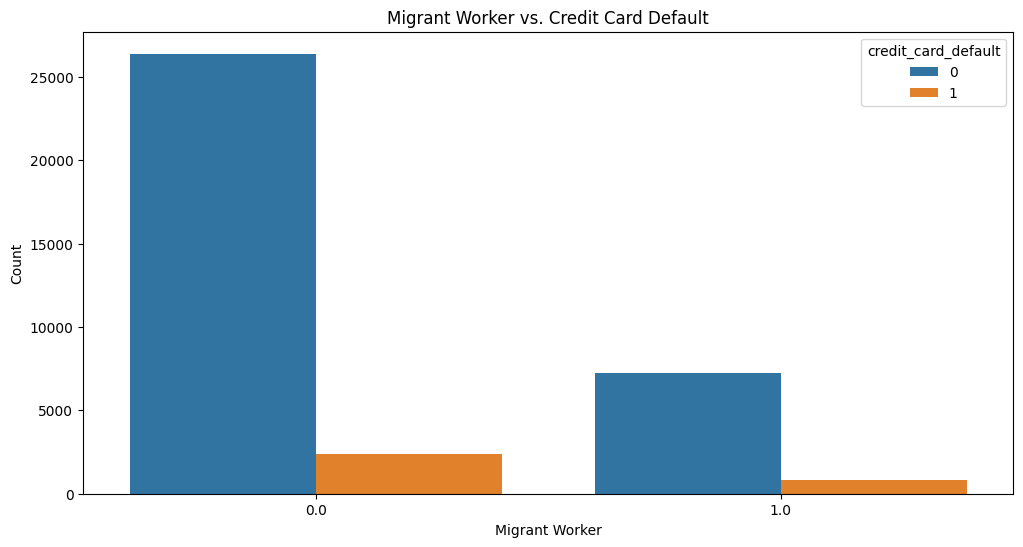

In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(x='migrant_worker', hue='credit_card_default', data=df)
plt.title('Migrant Worker vs. Credit Card Default')
plt.xlabel('Migrant Worker')
plt.ylabel('Count')
plt.show()

The plot suggests that migrant workers have a slightly higher rate of credit card default compared to non-migrant workers.


* A number of non-migrant workers also default on their credit cards. This indicates that migrant worker status is not the sole determinant of credit card default.
* There could be several factors contributing to this - Income Instability, Financial Literacy,etc.



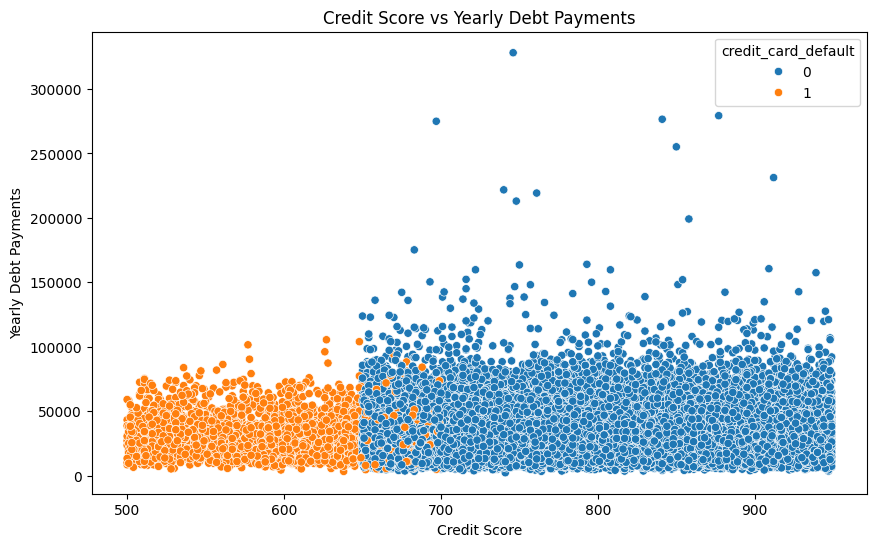

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='credit_score', y='yearly_debt_payments', hue='credit_card_default', data=df)
plt.title('Credit Score vs Yearly Debt Payments')
plt.xlabel('Credit Score')
plt.ylabel('Yearly Debt Payments')
plt.show()

*  Individuals with higher credit scores tend to have lower yearly debt payments, and vice versa. This is expected as individuals with higher credit scores are perceived as lower risk by lenders and may be offered lower interest rates or credit limits.

*  Individuals who defaulted on their credit cards are generally clustered in the region with lower credit scores and higher yearly debt payments.

*  The presence of overlapping regions indicate that credit score and debt payments are not the sole determinants of credit card default.

    Banks and financial institutions can identify high-risk individuals based on their credit scores and debt payments. This information can help in decisions regarding credit limits, interest rates, and loan approvals.







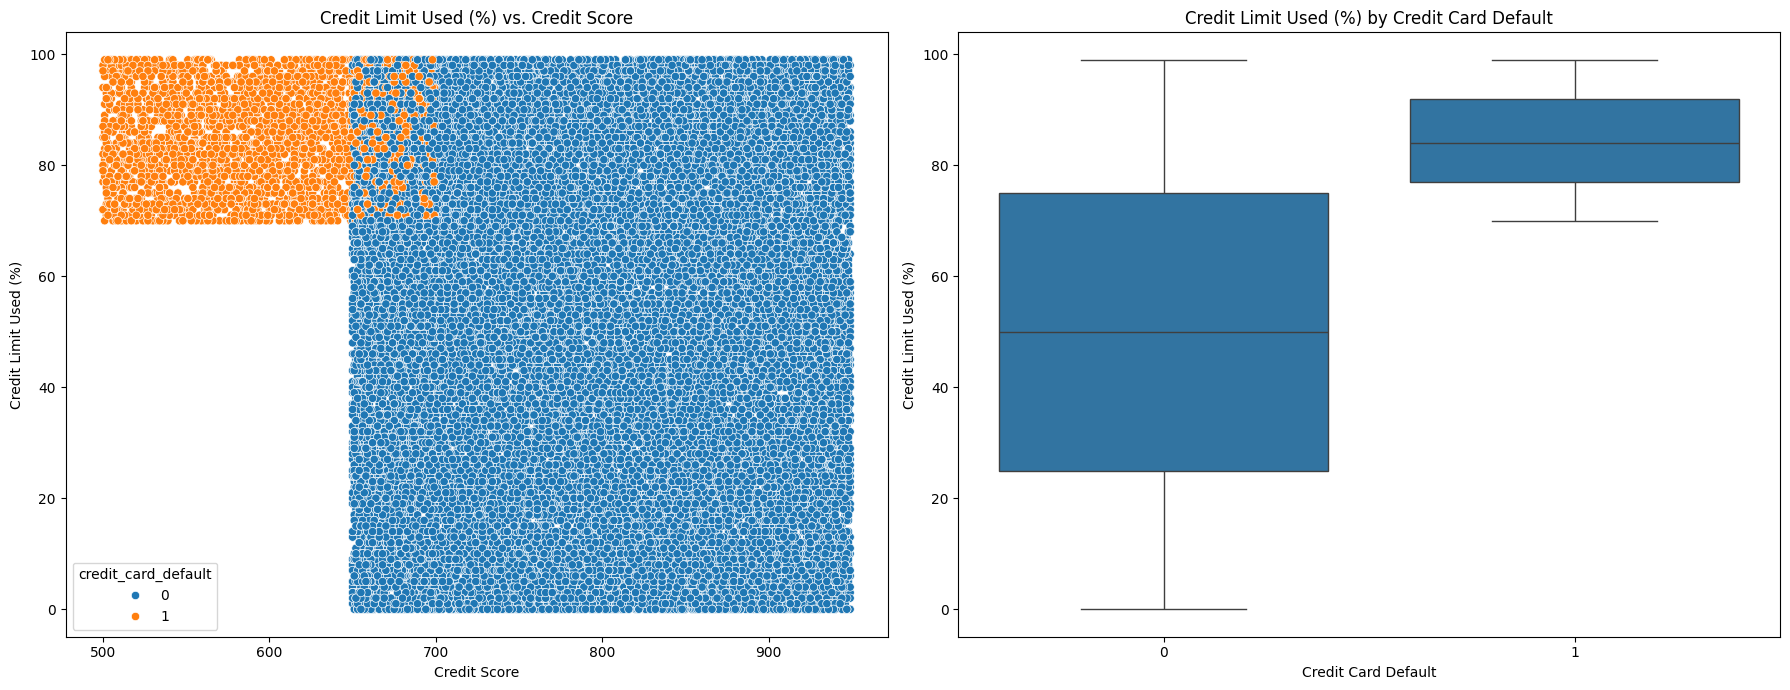

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(18, 7))

sns.scatterplot(x='credit_score', y='credit_limit_used(%)', hue='credit_card_default', data=df, ax=axes[0])
axes[0].set_title('Credit Limit Used (%) vs. Credit Score')
axes[0].set_xlabel('Credit Score')
axes[0].set_ylabel('Credit Limit Used (%)')

sns.boxplot(x='credit_card_default', y='credit_limit_used(%)', data=df, showfliers=False, ax=axes[1])
axes[1].set_title('Credit Limit Used (%) by Credit Card Default')
axes[1].set_xlabel('Credit Card Default')
axes[1].set_ylabel('Credit Limit Used (%)')

plt.tight_layout()
plt.show()

 Individuals with higher credit scores tend to have lower credit limit used percentages. As credit score decreases and credit limit used (%) increase , the chances of default also increase. This can also be better visualised from the boxplot beside, which shows that the median credit limit used is higher for individuals who defaulted compared to those who did not default.

 Key note - Using a higher percentage of the available credit might indicate potential financial strain or difficulty in managing debt, which can contribute to defaulting

 (Reference : https://www.livemint.com/money/personal-finance/exhausting-credit-card-limit-this-could-affect-your-credit-score-heres-how-credit-utilisation-ratio-impacts-cibil-11709748065431.html)

### Correlation Heatmap

In [ ]:
le = LabelEncoder()
df['owns_car_encoded'] = le.fit_transform(df['owns_car'])
df['owns_house_encoded'] = le.fit_transform(df['owns_house'])
df['gender_encoded'] = le.fit_transform(df['gender'])
df['occupation_type_encoded'] = le.fit_transform(df['occupation_type'])

df = df.drop(['owns_car', 'owns_house', 'gender', 'occupation_type'], axis=1)
df = df.reset_index(drop=True)

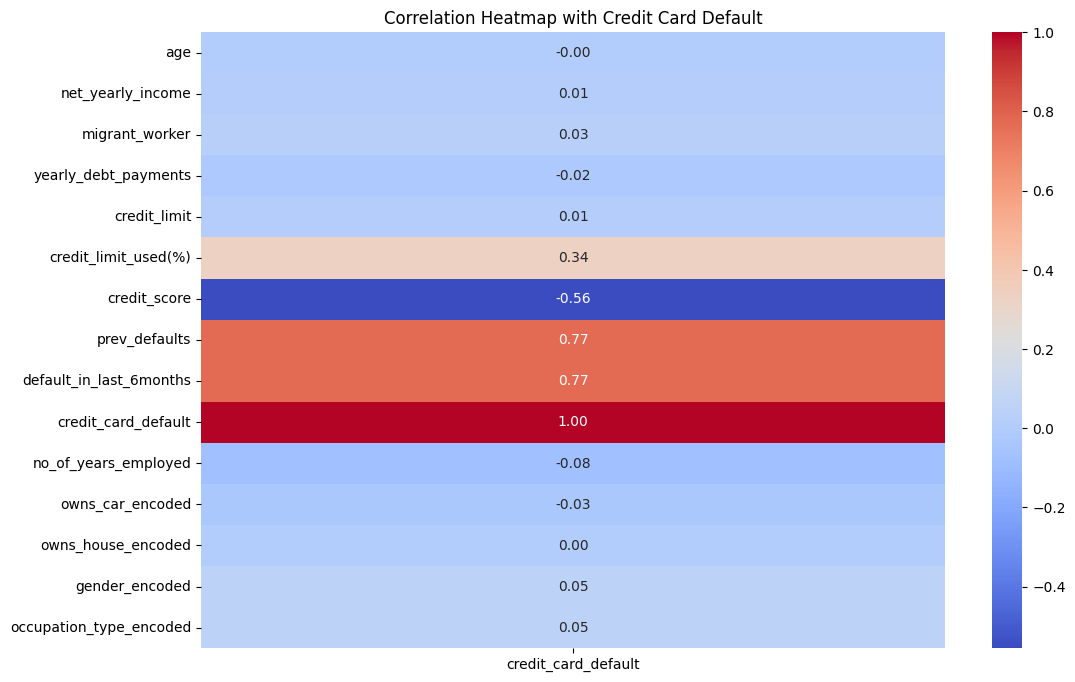

In [ ]:
correlation_matrix = df.corr()
default_corr = correlation_matrix['credit_card_default']
plt.figure(figsize=(12, 8))
sns.heatmap(default_corr.to_frame(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap with Credit Card Default')
plt.show()

As seen from above , the major factors are mostly related to payment behaviour of the individuals . Other factors might not have a direct association with the target column but may work in conujnction with the depending factors to determine Credit Default prediction.

### Raw Model Selection

* We have not considered age , gender since they do not affect credit card default.
* We have dropped the columns corresponding to owning house and car since people having either of them can default as well and vice-versa.

In [ ]:
df = df.drop(['owns_car_encoded', 'owns_house_encoded', 'gender_encoded'], axis=1)
df = df.reset_index(drop=True)
X = df.drop('credit_card_default', axis=1)
y = df['credit_card_default']


In [ ]:
numerical_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])


In [ ]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
print(x_train.shape,x_test.shape)

(29452, 11) (7363, 11)


In [ ]:
pipelines = {
    'Logistic Regression': make_pipeline(preprocessor, StandardScaler(), LogisticRegression()),
    'Random Forest': make_pipeline(preprocessor, RandomForestClassifier()),
    'Decision Tree': make_pipeline(preprocessor,DecisionTreeClassifier()),
    'Gradient Boosting': make_pipeline(preprocessor, GradientBoostingClassifier()),
    'XGboost':make_pipeline(preprocessor, XGBClassifier())
}

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=1)
for algo,model in pipelines.items():
  try:
    print(f'Training the {algo} model')
    model.fit(x_train,y_train)
    print(f'{algo} has been successfully fit.')
  except NotFittedError as e:
    print(repr(e))
  yhat = model.predict(x_test)
  report=classification_report(y_test,yhat,target_names=["Not default","Default"])
  print("report for {} is \n{}".format(algo,report))
  print("--------------")


Training the Logistic Regression model
Logistic Regression has been successfully fit.
report for Logistic Regression is 
              precision    recall  f1-score   support

 Not default       0.98      1.00      0.99      6707
     Default       0.95      0.79      0.86       656

    accuracy                           0.98      7363
   macro avg       0.96      0.89      0.92      7363
weighted avg       0.98      0.98      0.98      7363

--------------
Training the Random Forest model
Random Forest has been successfully fit.
report for Random Forest is 
              precision    recall  f1-score   support

 Not default       0.98      1.00      0.99      6707
     Default       0.98      0.77      0.86       656

    accuracy                           0.98      7363
   macro avg       0.98      0.88      0.92      7363
weighted avg       0.98      0.98      0.98      7363

--------------
Training the Decision Tree model
Decision Tree has been successfully fit.
report for Decisio

### SMOTE

In [ ]:
smote = SMOTE(sampling_strategy='minority')
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
X_res, y_res = smote.fit_resample(x_train, y_train)
print(X_res.shape,
x_test.shape)

(53856, 11) (7363, 11)


In [ ]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=1)
X_res, y_res = smote.fit_resample(x_train, y_train)
for algo, model in pipelines.items():
    try:
        print('Starting training for {}.'.format(algo))
        model.fit(X_res, y_res)
        print('{} has been successfully fit.'.format(algo))
    except NotFittedError as e:
        print(repr(e))
    yhat = model.predict(x_test)
    report=classification_report(y_test,yhat,target_names=["Not Default","Default"])
    print("report for {} is \n{}".format(algo,report))
    print("------------")


Starting training for Logistic Regression.
Logistic Regression has been successfully fit.
report for Logistic Regression is 
              precision    recall  f1-score   support

 Not Default       0.99      0.96      0.97      6707
     Default       0.68      0.94      0.79       656

    accuracy                           0.96      7363
   macro avg       0.84      0.95      0.88      7363
weighted avg       0.97      0.96      0.96      7363

------------
Starting training for Random Forest.
Random Forest has been successfully fit.
report for Random Forest is 
              precision    recall  f1-score   support

 Not Default       0.99      0.97      0.98      6707
     Default       0.77      0.89      0.83       656

    accuracy                           0.97      7363
   macro avg       0.88      0.93      0.90      7363
weighted avg       0.97      0.97      0.97      7363

------------
Starting training for Decision Tree.
Decision Tree has been successfully fit.
report for

### Undersampling

In [ ]:
rus = RandomUnderSampler(random_state=42)
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
X_train_un, y_train_un = rus.fit_resample(x_train, y_train)

In [ ]:
rus = RandomUnderSampler(random_state=42)
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=1)
X_train_un, y_train_un = rus.fit_resample(x_train, y_train)
for algo, model in pipelines.items():
    try:
        print('Starting training for {}.'.format(algo))
        model.fit(X_train_un, y_train_un)
        print('{} has been successfully fit.'.format(algo))
    except NotFittedError as e:
        print(repr(e))
    yhat = model.predict(x_test)
    report=classification_report(y_test,yhat,target_names=["Not Default","Default"])
    print("report for {} is \n{}".format(algo,report))
    print("------------")


Starting training for Logistic Regression.
Logistic Regression has been successfully fit.
report for Logistic Regression is 
              precision    recall  f1-score   support

 Not Default       1.00      0.94      0.97      6707
     Default       0.63      0.98      0.77       656

    accuracy                           0.95      7363
   macro avg       0.81      0.96      0.87      7363
weighted avg       0.96      0.95      0.95      7363

------------
Starting training for Random Forest.
Random Forest has been successfully fit.
report for Random Forest is 
              precision    recall  f1-score   support

 Not Default       1.00      0.95      0.97      6707
     Default       0.66      1.00      0.79       656

    accuracy                           0.95      7363
   macro avg       0.83      0.97      0.88      7363
weighted avg       0.97      0.95      0.96      7363

------------
Starting training for Decision Tree.
Decision Tree has been successfully fit.
report for

In our model we are getting best result on the raw data and it would be best to not forcefully undersample or oversample our data. Thus we will be using the raw data. Our main metric for evaluation is a mixture of precision and recall with higher weightage given to precission because we want our model to predict as much defaulters as it can but that too with a high precision. From the raw models we have choosen the best 3 models based on the precision,recall. 
Thus we can choose: Logistic, Random forest, XG boost.

### Final Model selection

In [ ]:
pipeline = Pipeline(steps=[
    ('preprocessor', ColumnTransformer(
        transformers=[
            ('cat', Pipeline(steps=[ ('onehot', OneHotEncoder(handle_unknown='ignore')
            )
            ]), make_column_selector(dtype_include=object)),  # Select categorical columns
            ('num', Pipeline(steps=[
                ('scaler', StandardScaler())
            ]), make_column_selector(dtype_include='number'))  # Select numerical columns
        ]
    ))
])

pipeline.fit(X)
X = pipeline.transform(X)

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.1)
print(x_train.shape)
print(x_test.shape)
print("number of defaulters in train data :" ,y_train[y_train==1].count())
print("number of defaulters in test data :", y_test[y_test==1].count())
pipelines = {
    'Logistic Regression': make_pipeline(preprocessor, StandardScaler(), LogisticRegression()),
    'Random Forest': make_pipeline(preprocessor, RandomForestClassifier()),
    'XGboost':make_pipeline(preprocessor, XGBClassifier()),
}

(33133, 11)
(3682, 11)
number of defaulters in train data : 2879
number of defaulters in test data : 331


In [ ]:
def metric_evaluation(x,y):
    accuracy=accuracy_score(x,y)
    con_matrix= confusion_matrix(x,y)
    report=classification_report(x,y,target_names=["Not Default","Default"])
    print("accuracy:",accuracy)
    print(con_matrix)
    print(report)


In [ ]:
models = {
    'Logistic Regression': LogisticRegression(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42,oob_score=True),
    'XGBoost': XGBClassifier()
}
param_grid = { 'Logistic Regression': {
    'C': [0.001, 0.01, 0.1, 1],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear']
        },
    'Random Forest': {
        'n_estimators': [50,75],
        'max_depth': [ 4,8,10],
        'min_samples_split': [2, 4,5,6],
        'min_samples_leaf': [1, 2, 3,4]
        },
    'XGBoost': {
        'n_estimators': [50, 60, 70, 80],
        'max_depth': [None, 3, 5, 7, 9, 11],
        'learning_rate': [ 0.1, 0.15, 0.2],
        'subsample': [0.6, 0.8, 1.0, 1.2],
        'colsample_bytree': [0.6, 0.8, 1.0]
    }
    }
best_models={}

for model_name, model in models.items():

  model=GridSearchCV(estimator=model,param_grid=param_grid[model_name],cv=9,verbose=2,n_jobs=-1,scoring=['precision','recall'],refit = 'precision')
  model.fit(x_train,y_train)
  print("{} has been successfully fitted".format(model.best_estimator_))
  best_model_parameter = model.best_params_
  print("Best Estimator:", best_model_parameter)
  print("Here are the evaluation of the models")
  yhat= model.predict(x_test)
  metric_evaluation(y_test,yhat)
print(best_models)

Fitting 9 folds for each of 8 candidates, totalling 72 fits
LogisticRegression(C=0.001, penalty='l1', random_state=42, solver='liblinear') has been successfully fitted
Best Estimator: {'C': 0.001, 'penalty': 'l1', 'solver': 'liblinear'}
Here are the evaluation of the models
accuracy: 0.9709397066811516
[[3351    0]
 [ 107  224]]
              precision    recall  f1-score   support

 Not Default       0.97      1.00      0.98      3351
     Default       1.00      0.68      0.81       331

    accuracy                           0.97      3682
   macro avg       0.98      0.84      0.90      3682
weighted avg       0.97      0.97      0.97      3682

Fitting 9 folds for each of 96 candidates, totalling 864 fits
RandomForestClassifier(max_depth=4, n_estimators=50, oob_score=True,
                       random_state=42) has been successfully fitted
Best Estimator: {'max_depth': 4, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
Here are the evaluation of the models
accu


* As we can see that my Logistic Regression model is performing well on the dataset and it is already a simple model , I have chosen not to go for further complex models.
* Since XGBoost has not given improved results as obtained by Random Forest even after taking more than 40-45 mins of computational time , we have decided to not choose complex models than this since our machines are not equipped to handle more complex models which would have eventually taken more than an hour to run.

* After carefully evaluating both SMOTE and Undersampling performances , we have decided to work with the raw data since it is performing better than both.
* We have not used Decision tree since it would not have improved the results obtained by Random forest ; so we went for XGBoost.






# Credit Card Churner Prediction
Dataset taken from:
https://www.kaggle.com/datasets/anwarsan/credit-card-bank-churn

### Importing Libraries 

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from matplotlib import cm
import warnings
import lazypredict
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split , GridSearchCV
from lazypredict.supervised import LazyClassifier
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from imblearn.under_sampling import RandomUnderSampler
from sklearn.metrics import recall_score,precision_score,f1_score,accuracy_score,confusion_matrix,classification_report
warnings.filterwarnings("ignore")
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer ,make_column_selector
from sklearn import set_config
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier,RandomForestClassifier,AdaBoostClassifier,StackingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.exceptions import NotFittedError
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import StackingClassifier

### Dataset

In [ ]:
df=pd.read_csv(r"C:\Users\Ashish\Documents\Python VScode\DATA Set\CC Churners.csv")
df.drop(columns=['Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'],inplace=True)
df.columns = df.columns.str.replace('_', ' ', regex=False)
df.head()

,CLIENTNUM,Attrition Flag,Customer Age,Gender,Dependent count,Education Level,Marital Status,Income Category,Card Category,Months on book,...,Months Inactive 12 mon,Contacts Count 12 mon,Credit Limit,Total Revolving Bal,Avg Open To Buy,Total Amt Chng Q4 Q1,Total Trans Amt,Total Trans Ct,Total Ct Chng Q4 Q1,Avg Utilization Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.00,777,11914.00,1.33,1144,42,1.62,0.06
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.00,864,7392.00,1.54,1291,33,3.71,0.10
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,1,0,3418.00,0,3418.00,2.59,1887,20,2.33,0.00
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,4,1,3313.00,2517,796.00,1.41,1171,20,2.33,0.76
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,1,0,4716.00,0,4716.00,2.17,816,28,2.50,0.00


Data Dictionary

CLIENTNUM: Client number. Unique identifier for the customer holding the account
 
Attrition_Flag: Internal event (customer activity) variable - if the account is closed then "Attrited Customer" else "Existing Customer"
 
Customer_Age: Age in Years
 
Gender: Gender of the account holder
 
Dependent_count: Number of dependents
 
Education_Level: Educational Qualification of the account holder - Graduate, High School, Unknown, Uneducated, College(refers to a college student), Post-Graduate, Doctorate.
 
Marital_Status: Marital Status of the account holder
 
Income_Category: Annual Income Category of the account holder
 
Card_Category: Type of Card
 
Months_on_book: Period of relationship with the bank
 
Total_Relationship_Count: Total no. of products held by the customer
 
Months_Inactive_12_mon: No. of months inactive in the last 12 months
 
Contacts_Count_12_mon: No. of Contacts between the customer and bank in the last 12 months
 
Credit_Limit: Credit Limit on the Credit Card
 
Total_Revolving_Bal: The balance that carries over from one month to the next is the revolving balance
 
Avg_Open_To_Buy: Open to Buy refers to the amount left on the credit card to use (Average of last 12 months)
 
Total_Trans_Amt: Total Transaction Amount (Last 12 months)
 
Total_Trans_Ct: Total Transaction Count (Last 12 months)
 
Total_Ct_Chng_Q4_Q1: Ratio of the total transaction count in 4th quarter and the total transaction count in 1st quarter
 
Total_Amt_Chng_Q4_Q1: Ratio of the total transaction amount in 4th quarter and the total transaction amount in 1st quarter
 
Avg_Utilization_Ratio: Represents how much of the available credit the customer spent

### At this stage, we have our certain hypotheses about the data.

Older customers are less likely to churn compared to younger customers as they have stable income sources.
There might be significant differences in churn rates between male and female customers as both genders have different lifestyle habits.
Customers with higher education levels and higher income are less likely to churn as they have better financial literacy and income stability.
Married customers d have lower churn rates than single or divorced customers as they caan have joint financial stability and stable lifestyle.
Customers holding premium card categories are less likely to churn because they have more facilities, high rewards associated with their cards.
A customer who have multiple existing relationship is less likely to churn.
Customers who have been inactive for longer periods are more likely to churn.
Increased interactions with customer support lead to higher churn rates.
Higher Credit limit is associated with lower churn rates.
Higher utilization ratio indicates either the customer has a habit of overspending or the customer can have financial stres and can reconsider using the card.
Higher transaction amounts and counts often reflect active engagement and satisfaction with the card, leading to greater loyalty and lower churn.


### EDA
Here we are interested to see whether our hypotheses are wrong or not.

#### Shape and basic info of the data 

In [ ]:
print(df.info())
print(df.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition Flag            10127 non-null  object 
 2   Customer Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent count           10127 non-null  int64  
 5   Education Level           10127 non-null  object 
 6   Marital Status            10127 non-null  object 
 7   Income Category           10127 non-null  object 
 8   Card Category             10127 non-null  object 
 9   Months on book            10127 non-null  int64  
 10  Total Relationship Count  10127 non-null  int64  
 11  Months Inactive 12 mon    10127 non-null  int64  
 12  Contacts Count 12 mon     10127 non-null  int64  
 13  Credit Limit              10127 non-null  float64
 14  Total 

In [ ]:
if (df.duplicated().sum()==0):
    print("There are no duplicate rows in the dataset")
else:
    print(f"There are {df.duplicated().sum()} duplicate rows in the dataset")

There are no duplicate rows in the dataset


There are no null values or duplicates in the dataset.

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CLIENTNUM,10127.00,739177606.33,36903783.45,708082083.00,713036770.50,717926358.00,773143533.00,828343083.00
Customer Age,10127.00,46.33,8.02,26.00,41.00,46.00,52.00,73.00
Dependent count,10127.00,2.35,1.30,0.00,1.00,2.00,3.00,5.00
Months on book,10127.00,35.93,7.99,13.00,31.00,36.00,40.00,56.00
Total Relationship Count,10127.00,3.81,1.55,1.00,3.00,4.00,5.00,6.00
Months Inactive 12 mon,10127.00,2.34,1.01,0.00,2.00,2.00,3.00,6.00
Contacts Count 12 mon,10127.00,2.46,1.11,0.00,2.00,2.00,3.00,6.00
Credit Limit,10127.00,8631.95,9088.78,1438.30,2555.00,4549.00,11067.50,34516.00
Total Revolving Bal,10127.00,1162.81,814.99,0.00,359.00,1276.00,1784.00,2517.00
Avg Open To Buy,10127.00,7469.14,9090.69,3.00,1324.50,3474.00,9859.00,34516.00


In [ ]:
def category_unique_value(data):
    Categorical_columns=data.select_dtypes(exclude=[np.int64, np.float64]).columns.unique().to_list()
    for cat_cols in Categorical_columns:
        print("Unique values and corresponding data counts for feature: " + cat_cols)
        df_temp = pd.concat(
            [
                data[cat_cols].value_counts(),
                data[cat_cols].value_counts(normalize=True) * 100,
            ],
            axis=1,
        )
        df_temp.columns = ["Count", "Percentage"]
        print(df_temp)
        print("-" * 90)
category_unique_value(df)

Unique values and corresponding data counts for feature: Attrition Flag
                   Count  Percentage
Attrition Flag                      
Existing Customer   8500       83.93
Attrited Customer   1627       16.07
------------------------------------------------------------------------------------------
Unique values and corresponding data counts for feature: Gender
        Count  Percentage
Gender                   
F        5358       52.91
M        4769       47.09
------------------------------------------------------------------------------------------
Unique values and corresponding data counts for feature: Education Level
                 Count  Percentage
Education Level                   
Graduate          3128       30.89
High School       2013       19.88
Unknown           1519       15.00
Uneducated        1487       14.68
College           1013       10.00
Post-Graduate      516        5.10
Doctorate          451        4.45
------------------------------------------

##### It can be seen that the attrition flag(Target variable) is imbalanced having  83.93% values as Existing Customers. 

#### Bivariate data analysis 

##### Categorical Data

In [ ]:
def cat_view(data: pd.DataFrame, x, target):
    fig, ax = plt.subplots(1, 2, figsize=(15, 4))
    s = data.groupby(x).size()
    values = s.values.tolist()
    index = s.index.tolist()
    total=sum(s)
    explode = [0.6 if size / total < 0.01 else 0 for size in s]
    wedges, texts, autotexts = ax[0].pie(
        values,
        autopct='%1.1f%%',
        explode=explode
    )
    
    ax[0].legend(
        wedges,
        index,
        title=x.capitalize(),
        loc="center left",
        bbox_to_anchor=(1, 0, 0.5, 1),
    )

    plt.setp(autotexts, size=12)

    ax[0].set_title(f"{x.capitalize()} Pie Chart")

    df1= pd.pivot_table(
        data, index=[x], columns=[target], values=["Credit Limit"], aggfunc=len
    )

    labels = df1.index.tolist()
    no = df1.values[:, 1].tolist()
    yes = df1.values[:, 0].tolist()

    l = np.arange(len(labels))  
    width = 0.35

    rects1 = ax[1].bar(
        l - width / 2, no, width, label="Existing Customer"
    )
    rects2 = ax[1].bar(
        l + width / 2, yes, width, label="Attrited Customer"
    )

    ax[1].set_ylabel("Count")
    ax[1].set_title(f"{x.capitalize()} Bar Graph")
    ax[1].set_xticks(l)
    ax[1].set_xticklabels(labels)
    ax[1].legend()

    def autolabel(rects):

        for rect in rects:
            height = rect.get_height()
            ax[1].annotate(
                "{}".format(height),
                xy=(rect.get_x() + rect.get_width() / 2, height),
                xytext=(0, 3), 
                textcoords="offset points",
                fontsize="medium",
                ha="center",
                va="bottom",
            )

    autolabel(rects1)
    autolabel(rects2)

    fig.tight_layout()
    plt.show()

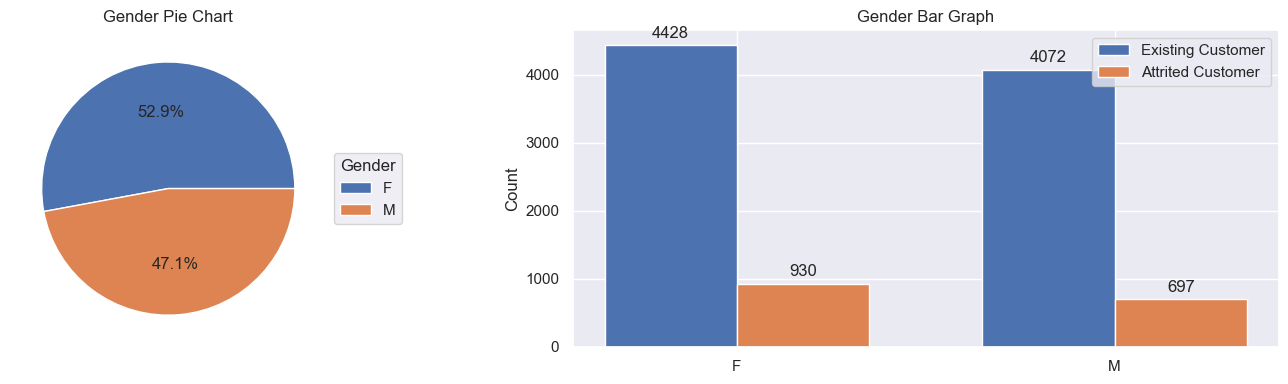

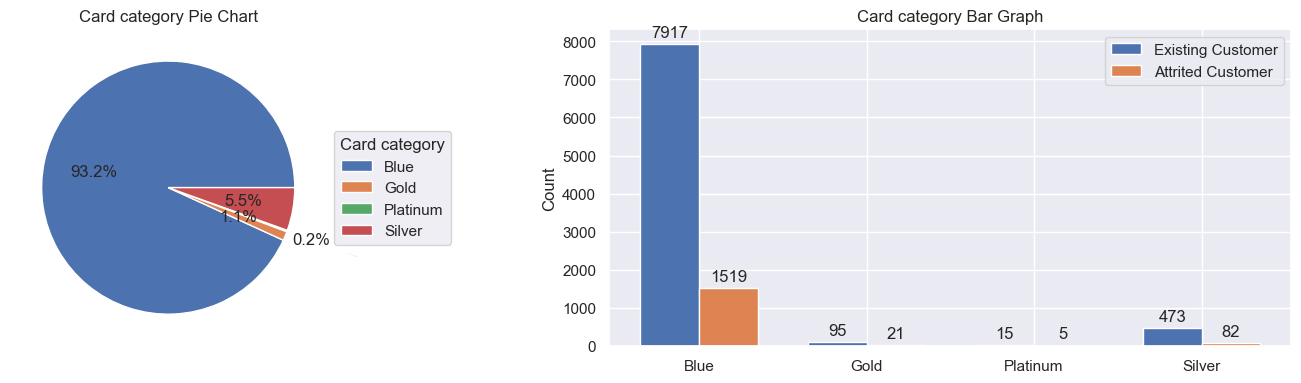

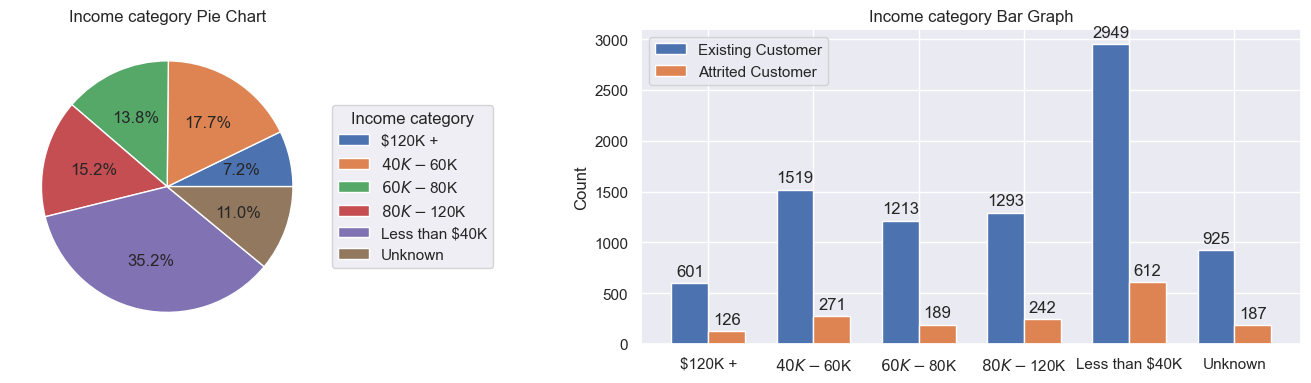

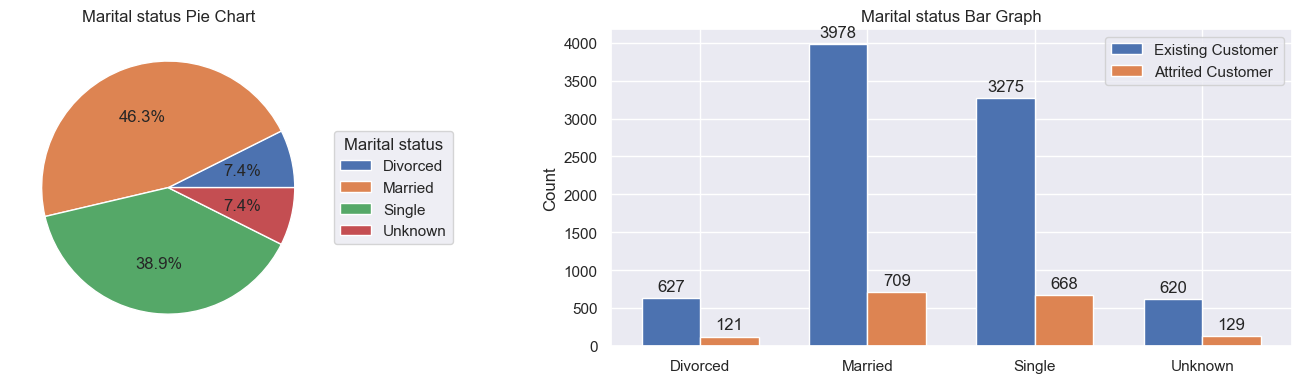

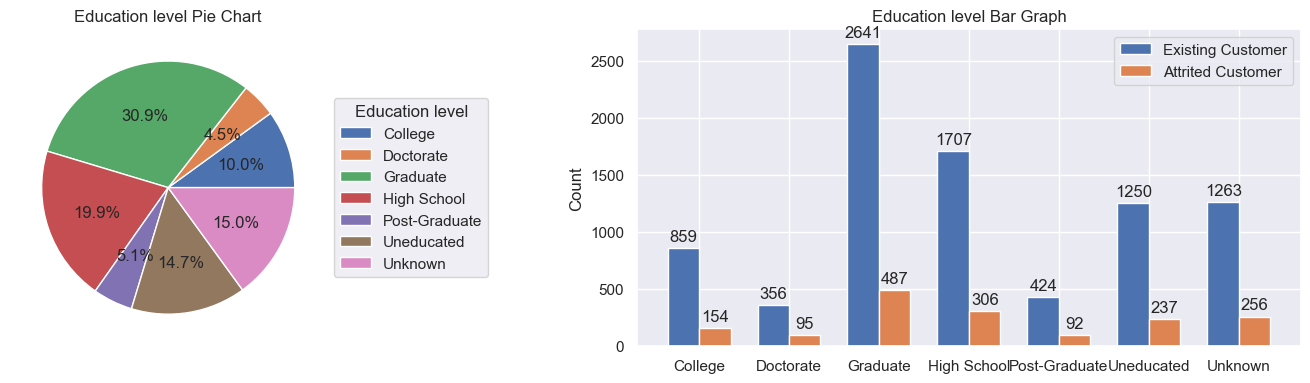

In [ ]:
cat_view(df, "Gender", "Attrition Flag")
cat_view(df, "Card Category", "Attrition Flag")
cat_view(df, "Income Category", "Attrition Flag")
cat_view(df, "Marital Status", "Attrition Flag")
cat_view(df, "Education Level", "Attrition Flag")

1. Churning does not depend on gender in this dataset.
2. Platinum card has seen most churners but the number of datapoints is not enough to reach any conclusion.Thus card Type is also not important for churning in the datset.
3. Churning rate does not depend on Marital status and income.
4. On an average, the churning is quite same irrespective of the education level of the customers. Though Doctorates have churned more than the others but datapoints are not sufficient to draw conclusions.

In [ ]:
def stackked_bar_plot(data,x,target):
    sns.set(palette="tab10")
    tab = pd.crosstab(data[x], data[target], normalize="index")

    tab.plot.bar(stacked=True, figsize=(10, 4))
    plt.title(x.capitalize() + " Stacked Bar Plot")
    plt.legend(loc="upper right", bbox_to_anchor=(0, 1))
    plt.show()

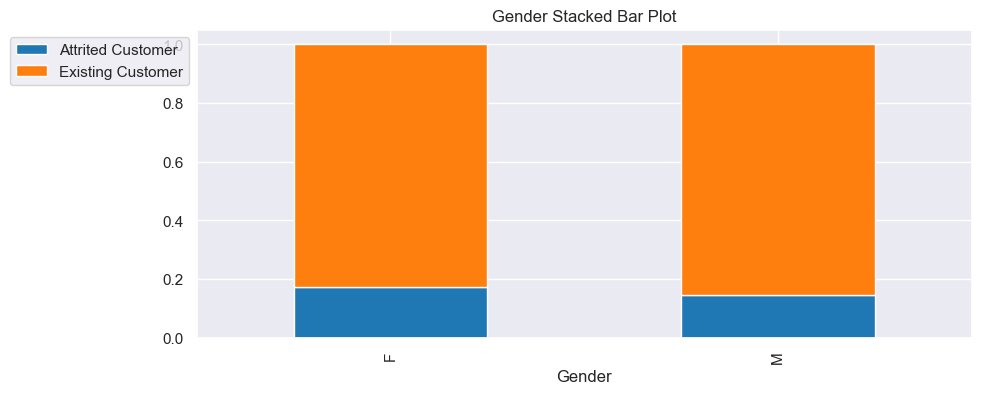

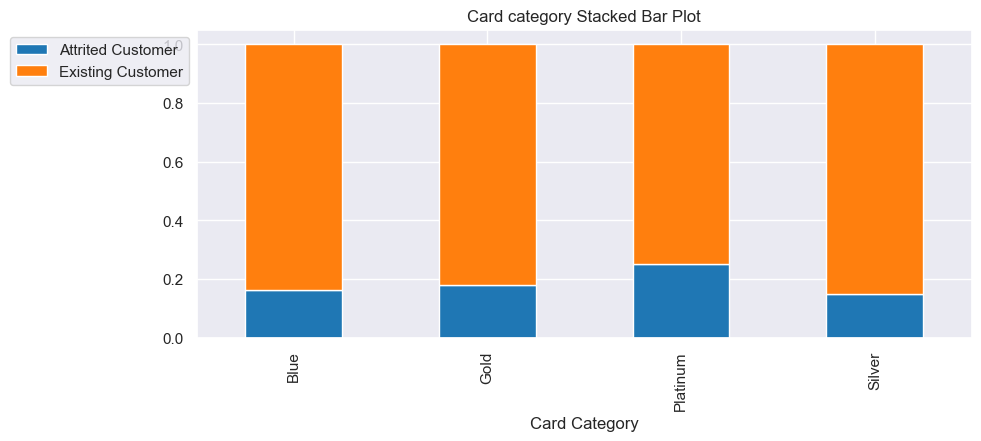

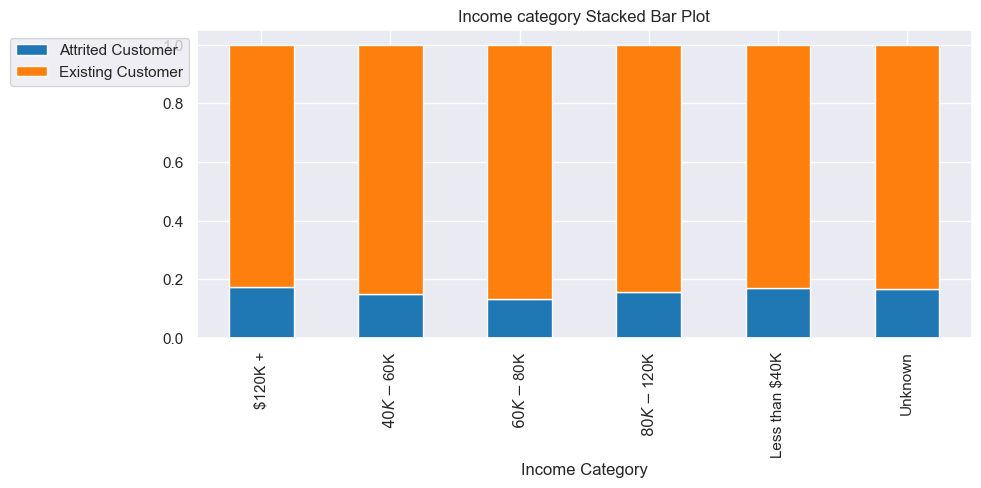

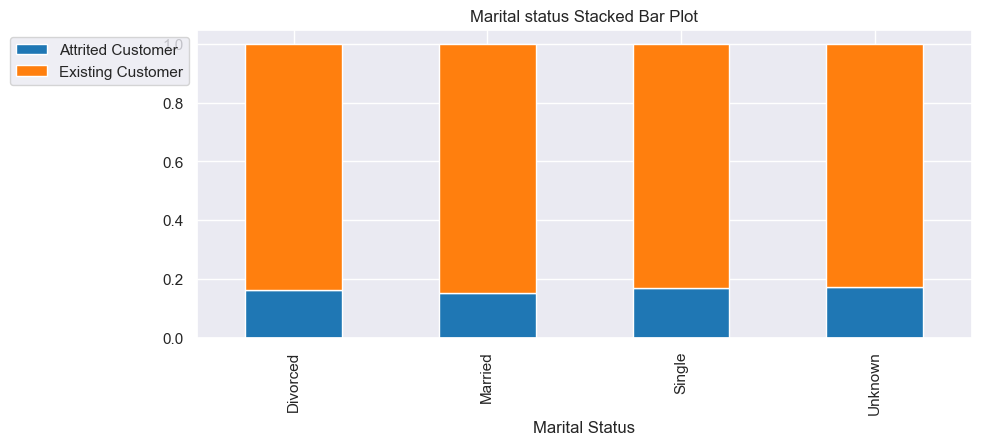

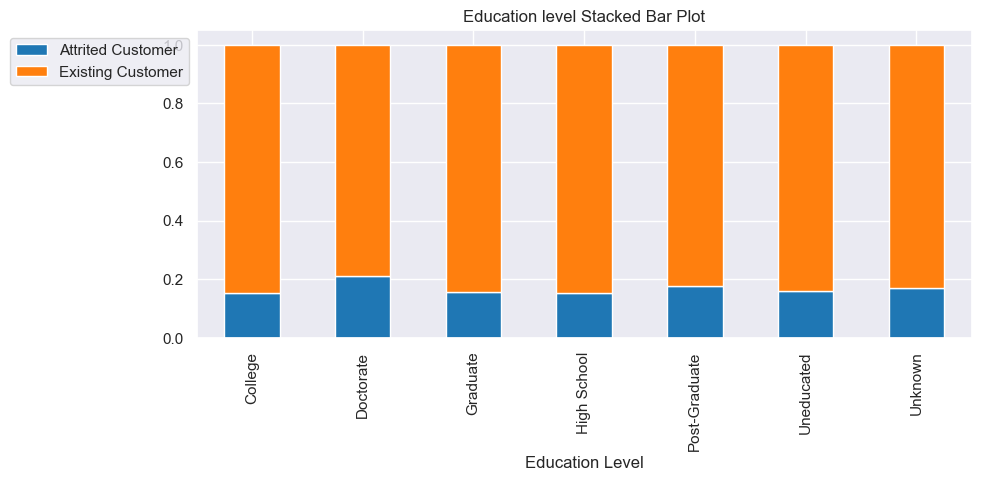

In [ ]:
stackked_bar_plot(df, "Gender", "Attrition Flag")
stackked_bar_plot(df, "Card Category", "Attrition Flag")
stackked_bar_plot(df, "Income Category", "Attrition Flag")
stackked_bar_plot(df, "Marital Status", "Attrition Flag")
stackked_bar_plot(df, "Education Level", "Attrition Flag")

##### Numerical data

In [ ]:
def box_by_target(data: pd.DataFrame, numeric_columns, target, include_outliers):
    subplot_cols = 2
    x=int(len(numeric_columns) / 2 + 1)
    plt.figure(figsize=(16, 3 * x))
    for i, col in enumerate(numeric_columns):
        plt.subplot(x, 2, i + 1)
        sns.boxplot(
            data=data,
            x=target,
            y=col,
            orient="vertical",
            palette="Blues",
            showfliers=include_outliers,
        )
        plt.tight_layout()
        plt.title( target + " vs. " + col, color="black")
    plt.show()

Without Outliers


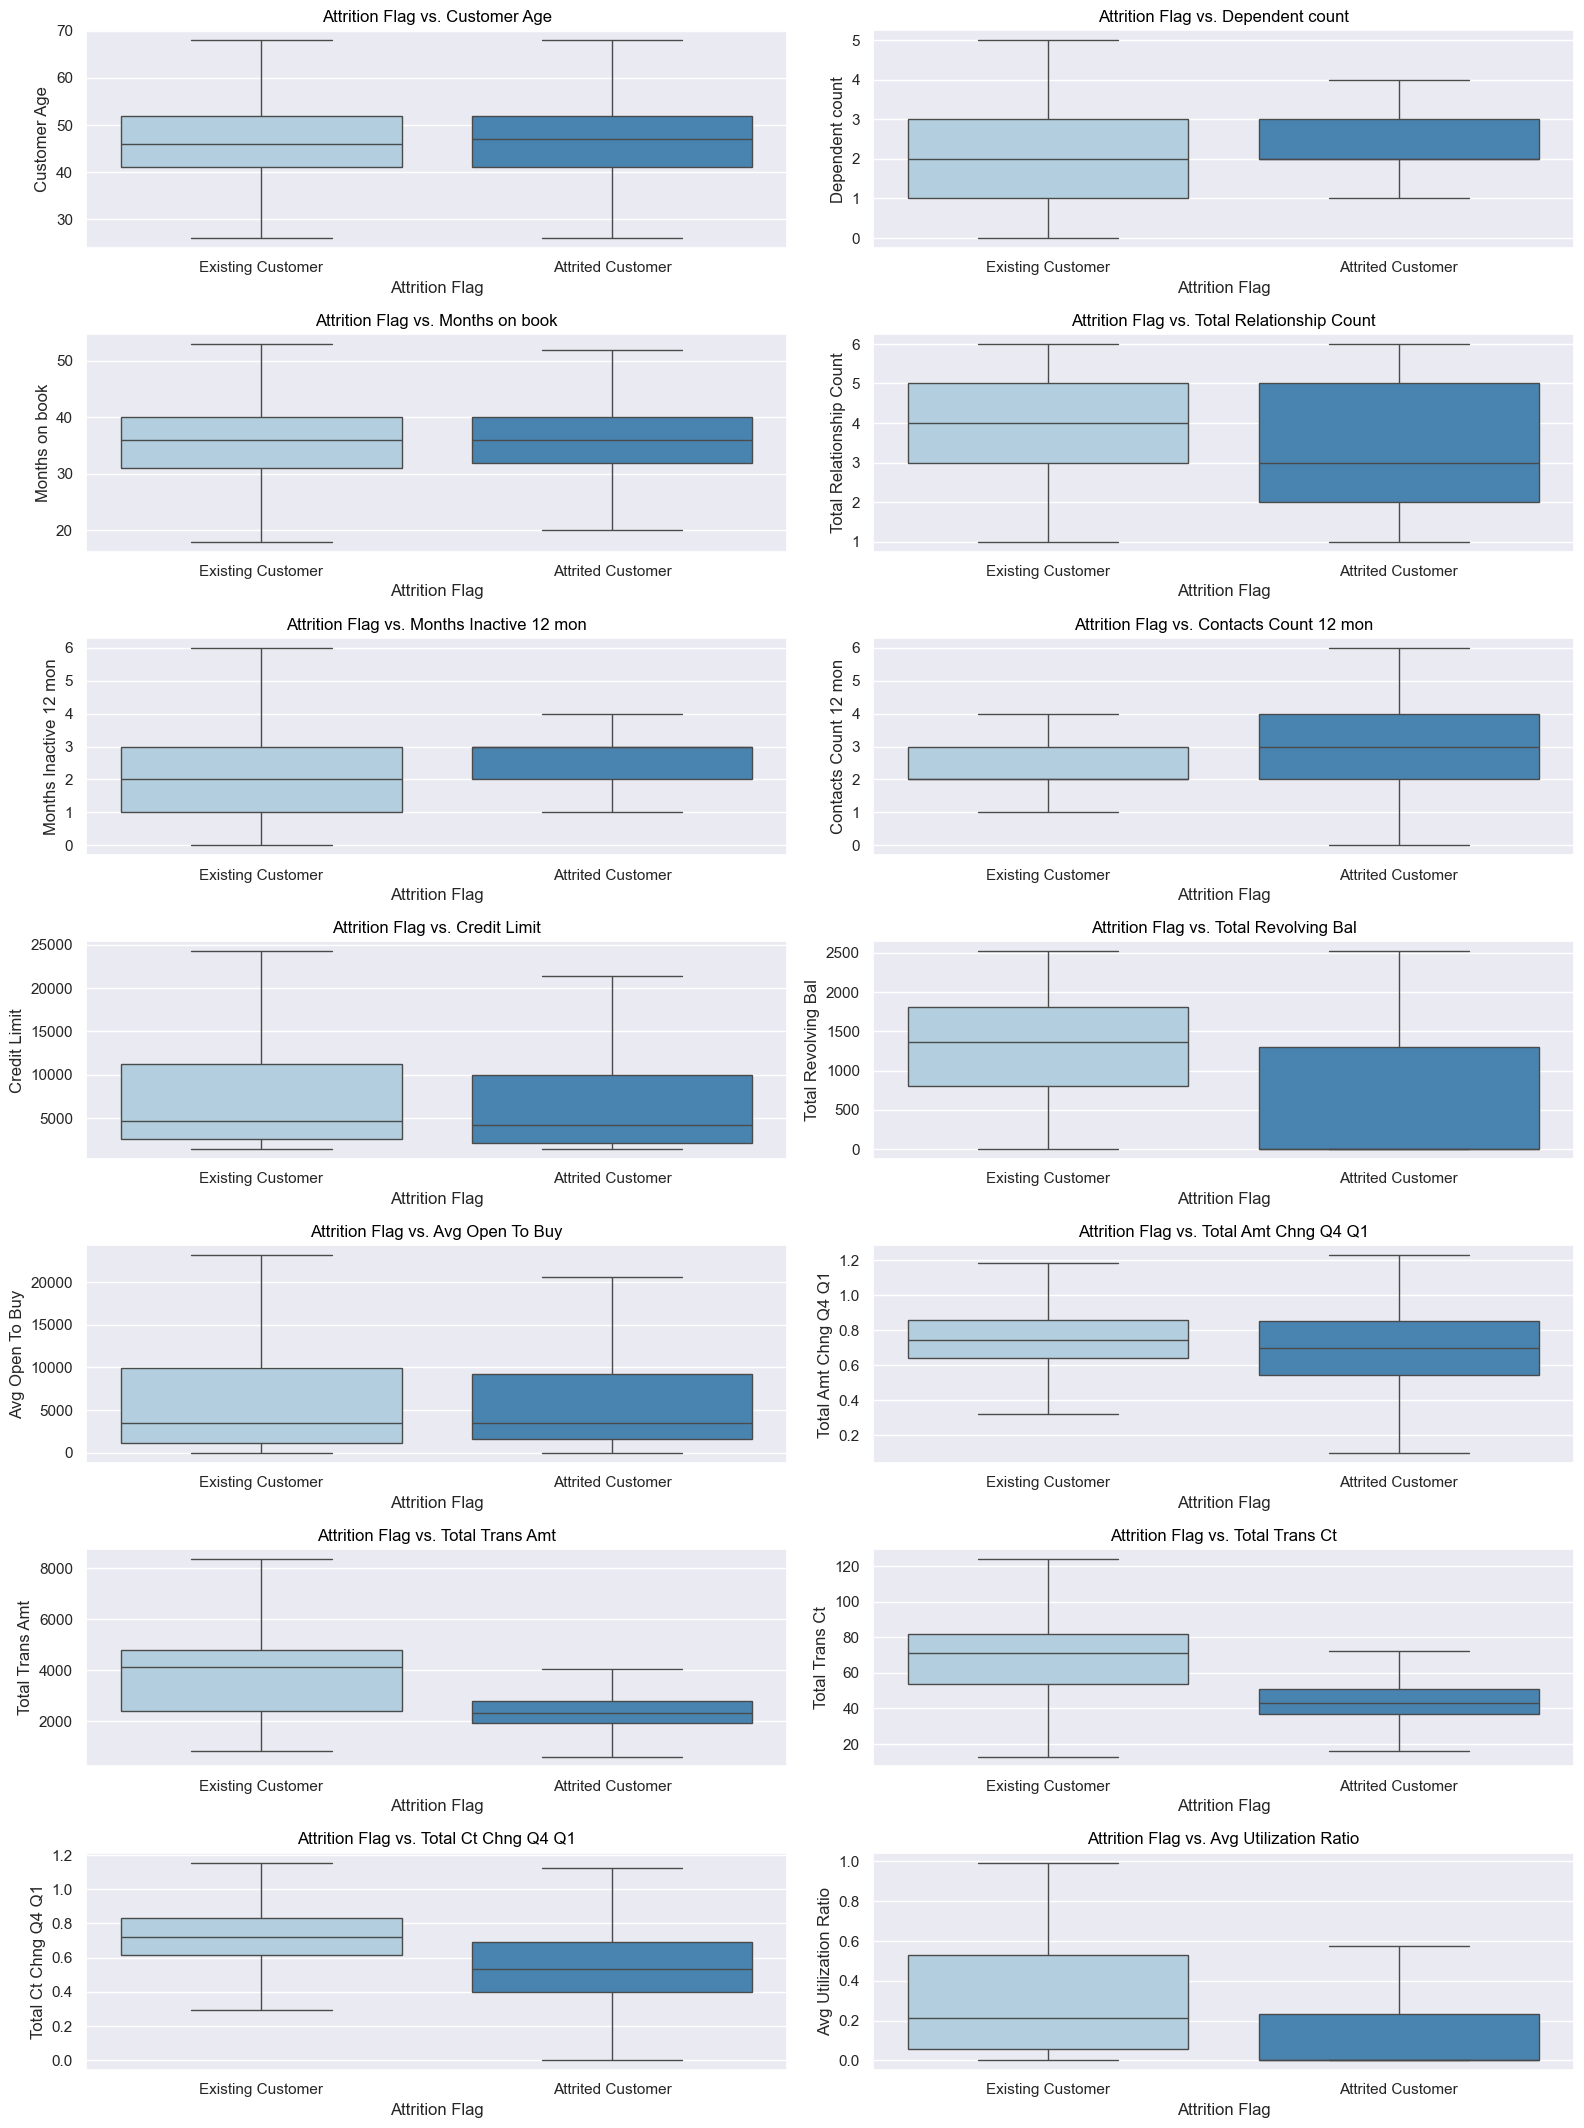

In [ ]:
numeric_columns = df.select_dtypes(exclude="object").columns.tolist()
numeric_columns=numeric_columns[1:]
print("Without Outliers")
box_by_target(df,numeric_columns,"Attrition Flag",False)

##### Correlation heatmap

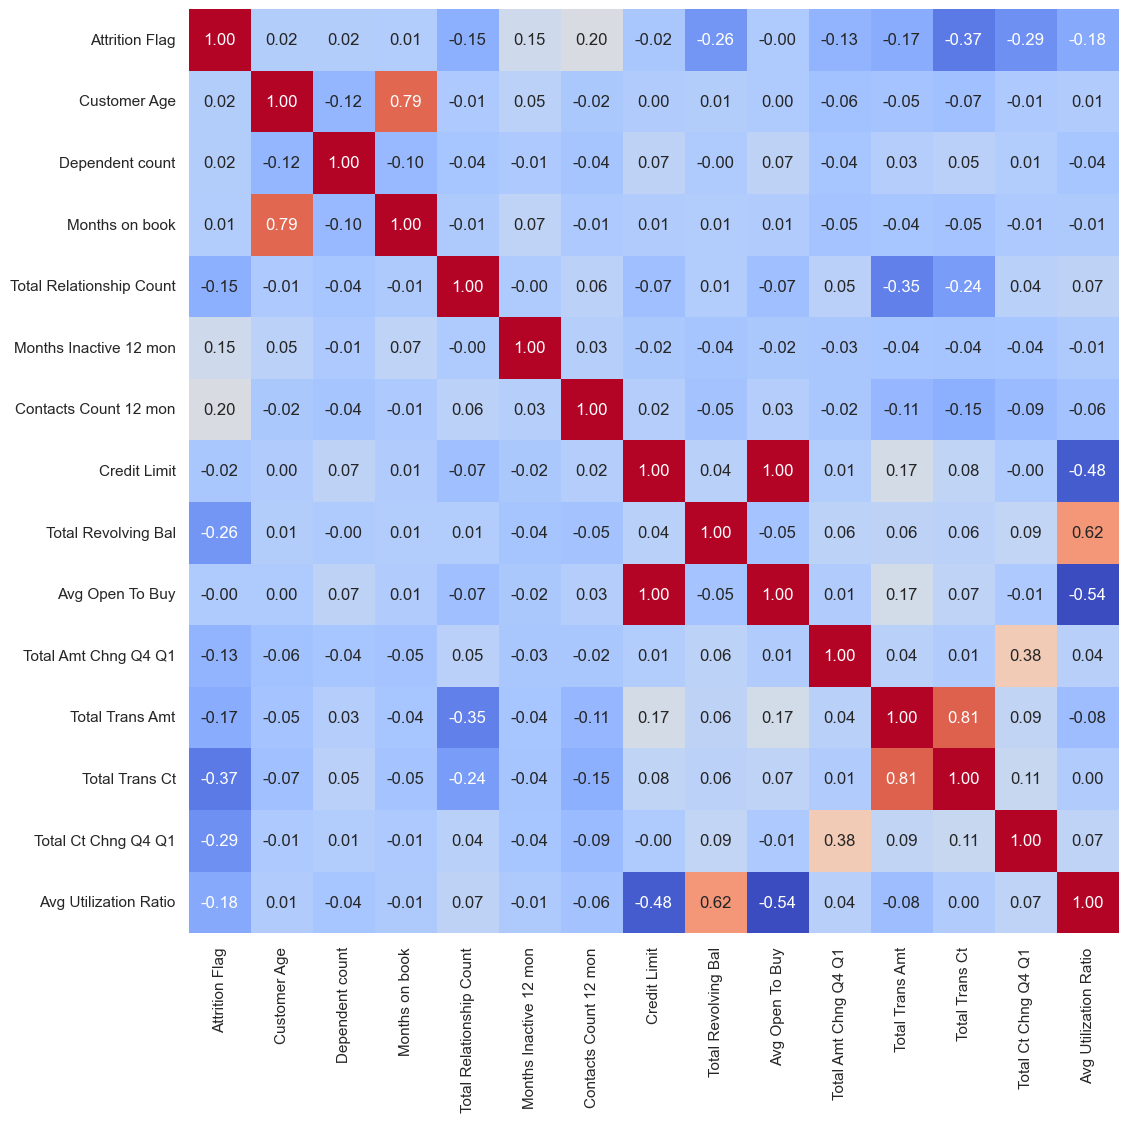

In [ ]:
codes = {'Existing Customer':0, 'Attrited Customer':1}
data_clean = df.drop(columns=["Gender","Education Level","Marital Status","Income Category","Card Category","CLIENTNUM"])
data_clean['Attrition Flag'] = data_clean['Attrition Flag'].map(codes).astype(int)


sns.set(rc={"figure.figsize": (12, 12)})
sns.heatmap(
    data_clean.corr(),
    annot=True,
    cbar=False,
    cmap="coolwarm",
    fmt="0.2f",
)
plt.show()

This clear from the above plots that churning is more of a financial behaviour or decision and it's not driven by any categorical attribute like age, gender, education and marital status but is by spending pattern nd behaviour. A much more insight about the spending behaviour of each customer would have given a much more clarity about how that particular customer uses the credit card on daily basis and predicting a churner would have been more accurate.
But focusing on what we have, we can drop unnecessary columns from our data.
But dropping the categorical data won't be a good idea because in real life card category, income category etc. may affect the churning which is not the case in this dataset but we want our model to bes designed to work on those datasets too.

#### Final dataset

In [ ]:
list1=df.columns
list2=['Total Relationship Count','Attrition Flag','Total Relationship Count', 'Months Inactive 12 mon',
       'Contacts Count 12 mon','Total Revolving Bal','Dependent count', 'Education Level', 'Marital Status',
       'Avg Open To Buy', 'Total Amt Chng Q4 Q1', 'Total Trans Amt', 'Income Category', 'Card Category', 'Months on book'
       'Total Trans Ct', 'Total Ct Chng Q4 Q1', 'Avg Utilization Ratio' ]
difference = list(set(list1) - set(list2))
df.drop(columns=difference,inplace=True)

In [ ]:
X=df.iloc[:,1:17]
Y=df.iloc[:,0]
mapping={'Existing Customer':0,"Attrited Customer":1}
Y=Y.map(mapping)
pipeline = Pipeline(steps=[
    ('preprocessor', ColumnTransformer(
        transformers=[
            ('cat', Pipeline(steps=[
                ('imputer', SimpleImputer(strategy='most_frequent')),
                ('onehot', OneHotEncoder(handle_unknown='ignore'))
            ]), make_column_selector(dtype_include=object)),  
            ('num', Pipeline(steps=[
                ('imputer', SimpleImputer(strategy='mean')),
                ('scaler', StandardScaler())
            ]), make_column_selector(dtype_include='number')) 
        ]
    ))
])

pipeline.fit(X)
X = pipeline.transform(X)

In [ ]:
X.shape

(10127, 31)

In [ ]:
Y.shape

(10127,)

### Model Selection

In [ ]:
lazy_clf = LazyClassifier(verbose=0)

##### Raw

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=42)
print(x_train.shape,
x_test.shape)

(8101, 31) (2026, 31)


In [ ]:
models = lazy_clf.fit(x_train, x_test, y_train, y_test)
models

100%|██████████| 31/31 [00:15<00:00,  1.98it/s]

[LightGBM] [Info] Number of positive: 1300, number of negative: 6801
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001552 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1620
[LightGBM] [Info] Number of data points in the train set: 8101, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.160474 -> initscore=-1.654705
[LightGBM] [Info] Start training from score -1.654705


(                               Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
 Model                                                                           
 LGBMClassifier                     0.95               0.89     0.89      0.95   
 XGBClassifier                      0.94               0.88     0.88      0.94   
 BaggingClassifier                  0.93               0.85     0.85      0.93   
 DecisionTreeClassifier             0.91               0.83     0.83      0.91   
 RandomForestClassifier             0.93               0.82     0.82      0.93   
 AdaBoostClassifier                 0.92               0.81     0.81      0.92   
 NearestCentroid                    0.75               0.73     0.73      0.78   
 ExtraTreesClassifier               0.90               0.73     0.73      0.89   
 PassiveAggressiveClassifier        0.83               0.70     0.70      0.83   
 SVC                                0.88               0.69     0.69      0.87   
 Perceptron     

##### SMOTE 

In [ ]:
smote = SMOTE(sampling_strategy='minority') 
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=42)
X_res, y_res = smote.fit_resample(x_train, y_train)
print(X_res.shape,
x_test.shape)

(13602, 31) (2026, 31)


In [ ]:
lazy_clf = LazyClassifier()
models = lazy_clf.fit(X_res, x_test, y_res, y_test)

models

100%|██████████| 31/31 [00:46<00:00,  1.51s/it]

[LightGBM] [Info] Number of positive: 6801, number of negative: 6801
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002574 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7014
[LightGBM] [Info] Number of data points in the train set: 13602, number of used features: 31
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


(                               Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
 Model                                                                           
 LGBMClassifier                     0.95               0.91     0.91      0.95   
 XGBClassifier                      0.94               0.89     0.89      0.94   
 AdaBoostClassifier                 0.92               0.88     0.88      0.92   
 BaggingClassifier                  0.92               0.87     0.87      0.93   
 RandomForestClassifier             0.94               0.86     0.86      0.93   
 DecisionTreeClassifier             0.90               0.84     0.84      0.90   
 ExtraTreesClassifier               0.91               0.77     0.77      0.91   
 SVC                                0.86               0.77     0.77      0.87   
 NuSVC                              0.84               0.76     0.76      0.85   
 BernoulliNB                        0.79               0.76     0.76      0.81   
 CalibratedClass

#### Undersampling

In [ ]:
rus = RandomUnderSampler(random_state=42)
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=42)
X_train_un, y_train_un = rus.fit_resample(x_train, y_train)
print(X_train_un.shape,y_train_un.shape)
lazy_clf = LazyClassifier()
models = lazy_clf.fit(X_train_un, x_test, y_train_un, y_test)

models

(2600, 31) (2600,)


100%|██████████| 31/31 [00:03<00:00,  7.92it/s]

[LightGBM] [Info] Number of positive: 1300, number of negative: 1300
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000534 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1620
[LightGBM] [Info] Number of data points in the train set: 2600, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


(                               Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
 Model                                                                           
 LGBMClassifier                     0.93               0.93     0.93      0.93   
 XGBClassifier                      0.92               0.92     0.92      0.93   
 BaggingClassifier                  0.92               0.91     0.91      0.92   
 RandomForestClassifier             0.92               0.91     0.91      0.92   
 AdaBoostClassifier                 0.90               0.91     0.91      0.91   
 DecisionTreeClassifier             0.88               0.86     0.86      0.89   
 ExtraTreesClassifier               0.88               0.85     0.85      0.88   
 NuSVC                              0.80               0.78     0.78      0.82   
 SVC                                0.80               0.78     0.78      0.82   
 BernoulliNB                        0.78               0.75     0.75      0.80   
 RidgeClassifier

From here we have selected the top predictors. 

### Model Selection Over Recall
Here we are focusing on recall as a measure because in this problem statement we can handle false positives. So, we can trade precision to get a higher recall.

In [ ]:
model_raw=[ "LGBMClassifier" ,"XGBClassifier", "RandomForestClassifier", "BaggingClassifier",
 "AdaBoostClassifier" , "ExtraTreesClassifier ", "DecisionTreeClassifier","SVC", "KNeighborsClassifier"]
model_smote=["LGBMClassifier","XGBClassifier","RandomForestClassifier","BaggingClassifier",
"AdaBoostClassifier","ExtraTreesClassifier" ,"DecisionTreeClassifier" ,"SVC","KNeighborsClassifier"]
model_downsampling=["XGBClassifier","LGBMClassifier","RandomForestClassifier","ExtraTreesClassifier","BaggingClassifier","AdaBoostClassifier","DecisionTreeClassifier"]

In [ ]:
final_model=set(model_raw) & set( model_smote) & set(model_downsampling)
print(final_model)

{'DecisionTreeClassifier', 'XGBClassifier', 'AdaBoostClassifier', 'LGBMClassifier', 'BaggingClassifier', 'RandomForestClassifier'}


In [ ]:
pipelines = {
    'xgboost': make_pipeline(XGBClassifier()),
    'rf':make_pipeline(RandomForestClassifier(random_state=42)),
    'lgbm':make_pipeline(LGBMClassifier(random_state=42)),
    'adaboost':make_pipeline(AdaBoostClassifier(random_state=42)),
    'dt':make_pipeline(DecisionTreeClassifier(random_state=42))
}

##### Raw

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=1)

for algo, model in pipelines.items():
    try:
        print('Starting training for {}.'.format(algo))
        model.fit(X_train, y_train)
        print('{} has been successfully fit.'.format(algo))
    except NotFittedError as e:
        print(repr(e))
    yhat = model.predict(X_test)
    report=classification_report(y_test,yhat,target_names=["Existing Customer","Attrited Customer"])
    print("report for {} is \n{}".format(algo,report))
    print("--------------")
    

Starting training for xgboost.
xgboost has been successfully fit.
report for xgboost is 
                   precision    recall  f1-score   support

Existing Customer       0.97      0.98      0.98      1695
Attrited Customer       0.90      0.85      0.87       331

         accuracy                           0.96      2026
        macro avg       0.93      0.92      0.92      2026
     weighted avg       0.96      0.96      0.96      2026

--------------
Starting training for rf.
rf has been successfully fit.
report for rf is 
                   precision    recall  f1-score   support

Existing Customer       0.95      0.99      0.97      1695
Attrited Customer       0.92      0.75      0.83       331

         accuracy                           0.95      2026
        macro avg       0.94      0.87      0.90      2026
     weighted avg       0.95      0.95      0.95      2026

--------------
Starting training for lgbm.
[LightGBM] [Info] Number of positive: 1296, number of negative: 6

##### SMOTE

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=1)
X_res, y_res = smote.fit_resample(x_train, y_train)
for algo, model in pipelines.items():
    try:
        print('Starting training for {}.'.format(algo))
        model.fit(X_res, y_res)
        print('{} has been successfully fit.'.format(algo))
    except NotFittedError as e:
        print(repr(e))
    yhat = model.predict(x_test)
    report=classification_report(y_test,yhat,target_names=["Existing Customer","Attrited Customer"])
    print("report for {} is \n{}".format(algo,report))
    print("------------")
    

Starting training for xgboost.
xgboost has been successfully fit.
report for xgboost is 
                   precision    recall  f1-score   support

Existing Customer       0.98      0.97      0.97      1695
Attrited Customer       0.87      0.87      0.87       331

         accuracy                           0.96      2026
        macro avg       0.92      0.92      0.92      2026
     weighted avg       0.96      0.96      0.96      2026

------------
Starting training for rf.
rf has been successfully fit.
report for rf is 
                   precision    recall  f1-score   support

Existing Customer       0.96      0.97      0.97      1695
Attrited Customer       0.84      0.80      0.82       331

         accuracy                           0.94      2026
        macro avg       0.90      0.88      0.89      2026
     weighted avg       0.94      0.94      0.94      2026

------------
Starting training for lgbm.
[LightGBM] [Info] Number of positive: 6805, number of negative: 6805


##### Undersampled

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=1)
X_train_un, y_train_un = rus.fit_resample(x_train, y_train)

for algo, model in pipelines.items():
    try:
        print('Starting training for {}.'.format(algo))
        model.fit(X_train_un, y_train_un)
        print('{} has been successfully fit.'.format(algo))
    except NotFittedError as e:
        print(repr(e))
    yhat = model.predict(x_test)
    report=classification_report(y_test,yhat,target_names=["Existing Customer","Attrited Customer"])
    print("report for {} is \n{}".format(algo,report))
    print("------------")
    

Starting training for xgboost.
xgboost has been successfully fit.
report for xgboost is 
                   precision    recall  f1-score   support

Existing Customer       0.99      0.92      0.95      1695
Attrited Customer       0.69      0.94      0.79       331

         accuracy                           0.92      2026
        macro avg       0.84      0.93      0.87      2026
     weighted avg       0.94      0.92      0.92      2026

------------
Starting training for rf.
rf has been successfully fit.
report for rf is 
                   precision    recall  f1-score   support

Existing Customer       0.98      0.91      0.95      1695
Attrited Customer       0.67      0.92      0.77       331

         accuracy                           0.91      2026
        macro avg       0.83      0.91      0.86      2026
     weighted avg       0.93      0.91      0.92      2026

------------
Starting training for lgbm.
[LightGBM] [Info] Number of positive: 1296, number of negative: 1296


As it can be seen that models do well overall and in the recall if the dataset is randomly downsampled. So from here on, the downsampled datset is used to get the model trained. In the downsampled data itself, RandomForestClassifier, XGBoostClassifier and LightGBM are doing well with high recall and fair amount of precision.
So these are our selected models on the downsampled dataset. 

### Final Model Run

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.1)
x_train_un, y_train_un = rus.fit_resample(x_train, y_train)
print(x_train_un.shape)
print(x_test.shape)
print(y_train_un.shape)
print("number of churners in train data :" ,y_train_un[y_train_un==1].count())
print("number of churners in test data :", y_test[y_test==1].count())

(2936, 31)
(1013, 31)
(2936,)
number of churners in train data : 1468
number of churners in test data : 159


In [ ]:
def metric_evaluation(x,y):
    accuracy=accuracy_score(x,y)
    con_matrix= confusion_matrix(x,y)
    report=classification_report(x,y,target_names=["Existing Customer","Attrited Customer"])
    print("accuracy:",accuracy)
    print(con_matrix)
    print(report)

In [ ]:
models = {
    'RandomForest': RandomForestClassifier(random_state=42),
    'XGBoost': XGBClassifier(),
    'LightGBM': LGBMClassifier(random_state=42)
}

param_grid = {
    'RandomForest': {
        'n_estimators': [50, 75, 100, 125, 150],
        'max_depth': [None, 5, 10, 15, 20, 25],
        'min_samples_split': [2, 5, 7, 10],
        'min_samples_leaf': [1, 2, 4, 6, 8]
    },
    'XGBoost': {
        'n_estimators': [75,80,85],
        'max_depth': [ 3, 5, 7, 9, 11],
        'learning_rate': [0.01, 0.05, 0.1],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0]
    },
    'LightGBM': {
        'n_estimators': [50, 75],
        'max_depth': [10, 15, 20],
        'learning_rate': [ 0.1, 0.15, 0.2],
        'num_leaves': [31, 63],
        'min_child_samples': [ 10,15,20,25]
    }
}

best_models = {}

for model_name, model in models.items():
    model=GridSearchCV(estimator=model,param_grid=param_grid[model_name],cv=9,verbose=2,n_jobs=-1,scoring='recall')
    model.fit(x_train_un,y_train_un)
    print("{} has been successfully fitted".format(model_name))
    best_model_parameter = model.best_params_
    best_models[model_name] = model.best_estimator_
    print("Best Estimator:", best_model_parameter)
    print("Here are the evaluation of the model")
    print("------------------")

    yhat= model.predict(x_test)
    metric_evaluation(y_test,yhat)

print(best_models)

Fitting 9 folds for each of 600 candidates, totalling 5400 fits
RandomForest has been successfully fitted
Best Estimator: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 75}
Here are the evaluation of the model
------------------
accuracy: 0.9131293188548865
[[777  77]
 [ 11 148]]
                   precision    recall  f1-score   support

Existing Customer       0.99      0.91      0.95       854
Attrited Customer       0.66      0.93      0.77       159

         accuracy                           0.91      1013
        macro avg       0.82      0.92      0.86      1013
     weighted avg       0.93      0.91      0.92      1013

Fitting 9 folds for each of 405 candidates, totalling 3645 fits
XGBoost has been successfully fitted
Best Estimator: {'colsample_bytree': 0.6, 'learning_rate': 0.1, 'max_depth': 9, 'n_estimators': 85, 'subsample': 1.0}
Here are the evaluation of the model
------------------
accuracy: 0.9299111549851925
[[791  63]
 [  8 151]]
 

#### Using Stacking

In [ ]:

base_learners = [
    ('rf', RandomForestClassifier(min_samples_split=5, n_estimators=75, random_state=42)),
    ('xg', XGBClassifier(colsample_bytree= 0.6, learning_rate= 0.05, max_depth= 9, n_estimators= 80, subsample= 0.8)),
    ('LightGBM', LGBMClassifier(learning_rate=0.15, max_depth=10, n_estimators=75,random_state=42))
]
meta_learner = LogisticRegression()
stacked_model = StackingClassifier(
    estimators=base_learners,
    final_estimator=meta_learner,
    cv=5)

stacked_model.fit(x_train_un, y_train_un)
y_pred = stacked_model.predict(x_test)
print(classification_report(y_test, y_pred, target_names=["Existing Customer","Attrited Customer"]))

[LightGBM] [Info] Number of positive: 1468, number of negative: 1468
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000213 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1600
[LightGBM] [Info] Number of data points in the train set: 2936, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Number of positive: 1174, number of negative: 1174
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000143 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1600
[LightGBM] [Info] Number of data points in the train set: 2348, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 1175, number of

In [ ]:
print(confusion_matrix(y_test,y_pred))

[[788  66]
 [  7 152]]


Thus by stacking we have achieved good precision, high recall and  high accuracy model. But LightGBM is performing better than or somewhat similar to the stacked model single handedly. So, LightGBM Classifier can be used here.

# Conclusion

As stated above, the models can be used to to tackle the problems related to a credit card in a smaller financial institute. The regions specific, institute specific demographic data is needed to implement the models in real life situations. 

# Citation

Various papers, newsarticles and notebooks on Kaggle were considered as source of knowledge, inspiration and execution.
Data Mining and Machine learning by Md. J. Zaki, Wagner Meira Jr. and Lecture Notes of Dr. Arpit Rana ,DA-IICT were considered as source of concepts and understanding of things used in this assignment.